<a href="https://colab.research.google.com/github/allefbcc/projetoCienciaDeDados-Walmart/blob/main/forecasting-notebook-group-6/N1_EDA_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importando Bibliotecas

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Lendo caminho do dataset

In [ ]:
# Define o caminho do arquivo no GCS
bucket_uri = "gs://m5_dados/M5_full.parquet"

In [ ]:
data = pd.read_parquet(bucket_uri)

In [ ]:
data

,id,item_id,dept_id,cat_id,store_id,state_id,value,date
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29
...,...,...,...,...,...,...,...,...
59181085,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,1,2016-05-22
59181086,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,2016-05-22
59181087,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,2,2016-05-22
59181088,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,2016-05-22


# Análise exploratória dos dados

### Analisando o dataset

In [ ]:
data.head(5)

,id,item_id,dept_id,cat_id,store_id,state_id,value,date
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29


In [ ]:
data.tail(5)

,id,item_id,dept_id,cat_id,store_id,state_id,value,date
59181085,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,1,2016-05-22
59181086,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,2016-05-22
59181087,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,2,2016-05-22
59181088,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,2016-05-22
59181089,FOODS_3_827_WI_3_evaluation,FOODS_3_827,FOODS_3,FOODS,WI_3,WI,1,2016-05-22


In [ ]:
data['date'] = pd.to_datetime(data['date'])
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
data['day_of_week'] = data['date'].dt.dayofweek

In [ ]:
data.head(5)

,id,item_id,dept_id,cat_id,store_id,state_id,value,date,year,month,day,day_of_week
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,2011,1,29,5
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,2011,1,29,5
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,2011,1,29,5
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,2011,1,29,5
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,2011,1,29,5


In [ ]:
data.head(5)

,id,item_id,dept_id,cat_id,store_id,state_id,value,date,year,month,day,day_of_week
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,2011,1,29,5
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,2011,1,29,5
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,2011,1,29,5
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,2011,1,29,5
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,2011,1,29,5


In [ ]:
data['dept_id'].unique()

['HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2', 'FOODS_1', 'FOODS_2', 'FOODS_3']
Categories (7, object): ['FOODS_1', 'FOODS_2', 'FOODS_3', 'HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2']

In [ ]:
data['cat_id'].unique()

['HOBBIES', 'HOUSEHOLD', 'FOODS']
Categories (3, object): ['FOODS', 'HOBBIES', 'HOUSEHOLD']

In [ ]:
data['store_id'].unique()

['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3']
Categories (10, object): ['CA_1', 'CA_2', 'CA_3', 'CA_4', ..., 'TX_3', 'WI_1', 'WI_2', 'WI_3']

In [ ]:
data['state_id'].unique()

['CA', 'TX', 'WI']
Categories (3, object): ['CA', 'TX', 'WI']

### Total de vendas por categoria

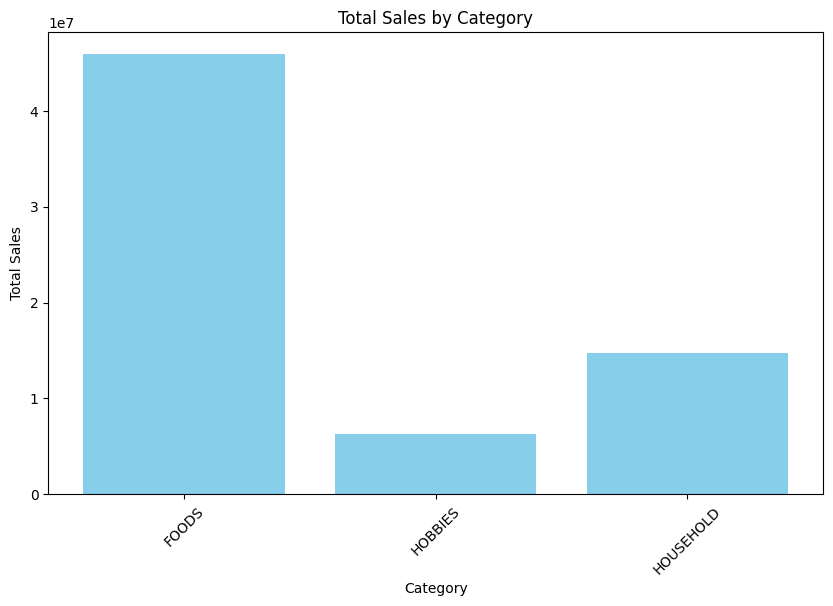

      cat_id     value
0      FOODS  45922427
1    HOBBIES   6240656
2  HOUSEHOLD  14764090


In [ ]:
category_sales = data.groupby('cat_id', observed=False)['value'].sum().reset_index()

# Plot the total sales by category
plt.figure(figsize=(10, 6))
plt.bar(category_sales['cat_id'], category_sales['value'], color='skyblue')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.title('Total Sales by Category')
plt.xticks(rotation=45)
plt.show()

print(category_sales)

Observações:

Necessidade Básica vs. Lazer:

- Alimentos (Foods): Esta categoria abrange necessidades básicas e essenciais. Todos precisam comprar alimentos regularmente, o que resulta em vendas consistentemente altas.

- Hobbies: Itens de hobbies são considerados não essenciais e geralmente são comprados com menos frequência e em menor volume. Isso pode explicar as vendas significativamente menores.

- Utensílios Domésticos (Household): Enquanto muitos itens dessa categoria também são essenciais, como produtos de limpeza e utensílios de cozinha, a necessidade de reposição não é tão frequente quanto a dos alimentos. Isso resulta em vendas moderadas.

Frequência de Compra:

- Foods: São comprados regularmente, muitas vezes semanalmente ou até diariamente, o que aumenta o volume de vendas.

- Hobbies: Compras nesta categoria tendem a ser esporádicas e muitas vezes são consideradas luxos ou extras, não compras regulares.

- Household: Compras dessa categoria são feitas conforme a necessidade, que pode variar, mas não são tão frequentes quanto alimentos.

Sazonalidade e Promoções:

- Foods: A demanda é relativamente constante ao longo do ano, embora possa haver picos durante feriados ou eventos especiais.

- Hobbies: Podem ter picos de vendas em certos períodos, como férias ou lançamentos de novos produtos, mas não é constante.

- Household: A demanda pode ser influenciada por eventos sazonais, como mudanças de estação ou grandes promoções, mas ainda assim não tão constante quanto alimentos.


### Categoria Hobbies

In [ ]:
data_hobbies = data[data['cat_id'] == 'HOBBIES']

In [ ]:
data_hobbies

,id,item_id,dept_id,cat_id,store_id,state_id,value,date,year,month,day,day_of_week
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,2011,1,29,5
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,2011,1,29,5
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,2011,1,29,5
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,2011,1,29,5
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,2011-01-29,2011,1,29,5
...,...,...,...,...,...,...,...,...,...,...,...,...
59178601,HOBBIES_2_145_WI_3_evaluation,HOBBIES_2_145,HOBBIES_2,HOBBIES,WI_3,WI,0,2016-05-22,2016,5,22,6
59178602,HOBBIES_2_146_WI_3_evaluation,HOBBIES_2_146,HOBBIES_2,HOBBIES,WI_3,WI,0,2016-05-22,2016,5,22,6
59178603,HOBBIES_2_147_WI_3_evaluation,HOBBIES_2_147,HOBBIES_2,HOBBIES,WI_3,WI,0,2016-05-22,2016,5,22,6
59178604,HOBBIES_2_148_WI_3_evaluation,HOBBIES_2_148,HOBBIES_2,HOBBIES,WI_3,WI,0,2016-05-22,2016,5,22,6


In [ ]:
data_hobbies = data_hobbies.drop(columns=['id'])

### Analisando loja1 da California - Parte de Hobbies

In [ ]:
data_hobbies_ca1 = data_hobbies[data_hobbies['store_id'] == 'CA_1']

# Agrupar por 'item_id' e somar os valores de vendas
vendas_por_item = data_hobbies_ca1.groupby('item_id', observed=False)['value'].sum()

# Ordenar os itens por vendas em ordem decrescente
vendas_por_item = vendas_por_item.sort_values(ascending=False)

# Mostrar os itens que mais venderam
print(vendas_por_item.head())

item_id
HOBBIES_1_348    23006
HOBBIES_1_371    22891
HOBBIES_1_268    19129
HOBBIES_1_178    15973
HOBBIES_1_256    15649
Name: value, dtype: int16


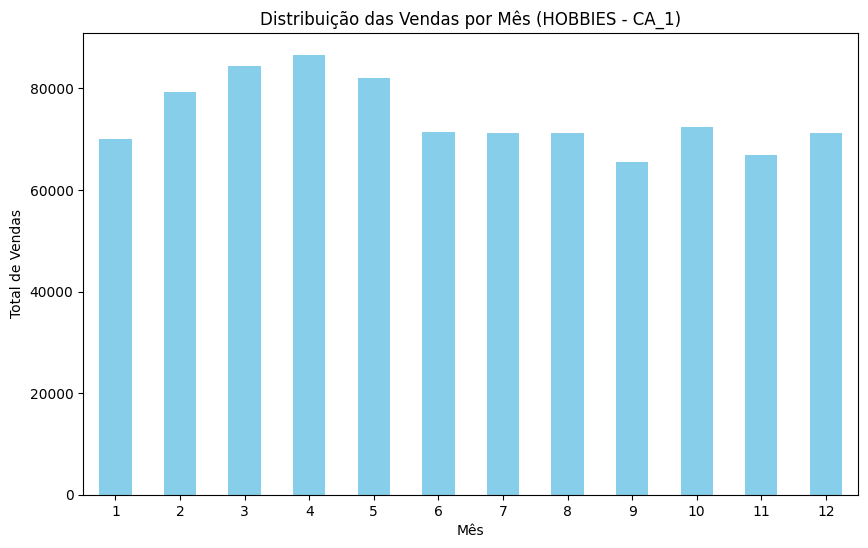

In [ ]:
data_hobbies_ca1 = data_hobbies[data_hobbies['store_id'] == 'CA_1']

# Agrupar por 'month' e somar os valores de vendas
vendas_por_mes = data_hobbies_ca1.groupby('month')['value'].sum()

vendas_por_mes.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Distribuição das Vendas por Mês (HOBBIES - CA_1)')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=0)
plt.show()

Sobre o mês de abril possuir o maior pico de vendas podemos, encontrar algumas razões:

- Eventos Sazonais e Feriados: Março e abril possuem feriados importantes (César Chávez Day, California Poppy Day) o que pode indicar crescimento nas vendas dos setores (incluindo hobbies). Esses eventos atraem multidões que impulsionam as vendas de itens de hobbies e entre outros. Por exemplo, a Páscoa(março e abril) muitas vezes ocorre em abril pode aumentar a demanda por papéis decorativos para embrulho de presentes, kits temáticos e etc.

- Mudança de Estação: jardinagem e atividades ao ar Livre: Com o clima mais quente e os dias mais longos, há um aumento na demanda por artigos de jardinagem, como sementes, ferramentas de jardinagem, e plantas. Atividades ao ar livre, como caminhadas, camping e ciclismo, também ganham popularidade, resultando em maior venda de equipamentos relacionados.
Esportes ao ar Livre: Esportes como beisebol, futebol e tênis tornam-se mais populares, aumentando as vendas de equipamentos esportivos.

- Promoções e Descontos: A loja pode ter realizado promoções ou campanhas de marketing específicas para o mês de abril, resultando em um aumento nas vendas.

- Renda Disponível: Algumas empresas podem distribuir bônus ou reembolsos de impostos que são usados pelos consumidores para gastar mais comprando produtos.


Insights:

- Tendência Geral de Vendas: O gráfico mostra uma tendência geral de vendas relativamente estável ao longo do ano, com um leve aumento nos meses iniciais (janeiro a abril) e uma diminuição gradual nos meses seguintes.

- Meses com Vendas Baixas: Mês de setembro (9) e novembro (11) pode indicar períodos de férias onde as pessoas gastam menos em produtos, geralmente por optarem estar fazendo viagens.

- Influência de Fatores Externos: É importante considerar outros fatores externos que podem influenciar as vendas, como mudanças econômicas, novas tendências de hobbies, ou lançamentos de produtos específicos.

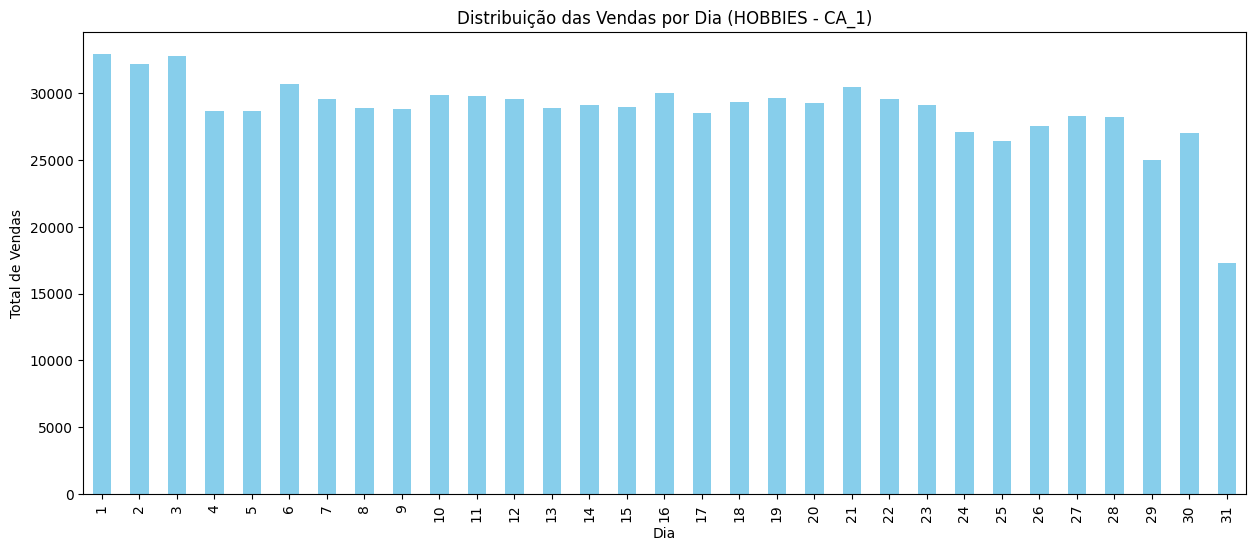

In [ ]:
vendas_por_dia = data_hobbies_ca1.groupby('day')['value'].sum()

vendas_por_dia.plot(kind='bar', figsize=(15, 6), color='skyblue')
plt.title('Distribuição das Vendas por Dia (HOBBIES - CA_1)')
plt.xlabel('Dia')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=90)
plt.show()

- Vendas no Início do Mês: Os primeiros dias do mês (1 a 3) apresentam picos de vendas mais altos em comparação com outros dias. O dia 1, em particular, destaca-se com o maior total de vendas. Muitas pessoas recebem seus salários no início do mês, o que pode resultar em maior poder de compra e, consequentemente, um aumento nas vendas de produtos.

- Vendas Estáveis: Após os primeiros dias, as vendas se mantêm relativamente estáveis durante o resto do mês, com pequenas variações. Consumidores podem planejar suas compras maiores para o início/metade do mês, aproveitando o orçamento recém-recebido.

- Declínio no Final do Mês: Há uma tendência de queda nas vendas nos últimos dias do mês, especialmente no dia 31. À medida que o mês avança, os consumidores podem ter menos dinheiro disponível, resultando em uma diminuição nas compras não essenciais.

Insights

- Dias de Maior Movimento: Além dos dias 1 a 3, os dias 6, 16 e 21 também mostram picos de vendas relativamente altos. Estes podem estar relacionados a fins de semana ou feriados que são períodos comuns para compras de lazer.

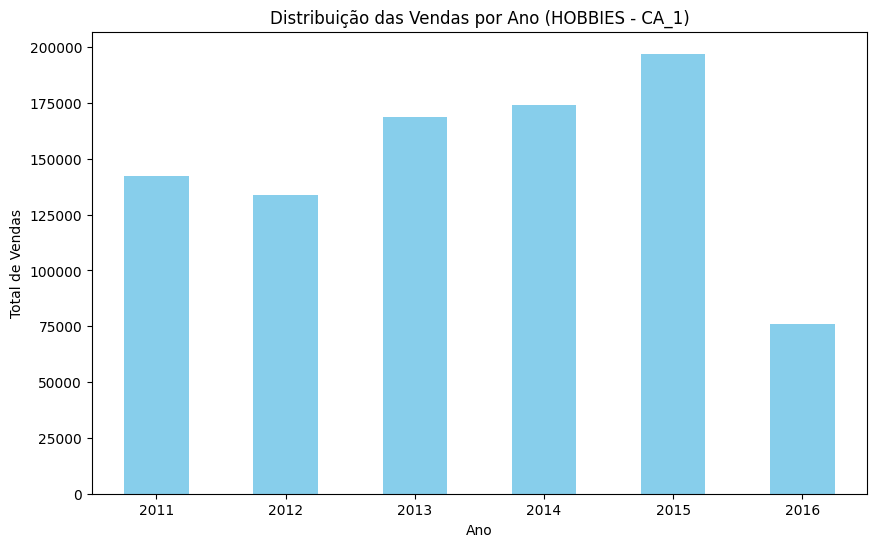

In [ ]:
vendas_por_ano = data_hobbies_ca1.groupby('year')['value'].sum()


vendas_por_ano.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Distribuição das Vendas por Ano (HOBBIES - CA_1)')
plt.xlabel('Ano')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=0)
plt.show()

- 2012 e 2016 tiveram os piores indicios de compras em relação a produtos relacionados a hobbies, em 2012 pode está relacionado com o marketing e estratégias de vendas que foram mal sucedidas e que posteriormnete foram corrigidas nos anos seguintes já que houve uma cresente na quantidade de vendas. Já em 2016 com os dados que se têm, onde as informações não constam do ano inteiro, pode ser que haja indicios de crescimento de vendas.


### Analisando loja CA1 - Categoria de FOODS

In [ ]:
data_foods_ca1 = data[(data['cat_id'] == 'FOODS') & (data['store_id'] == 'CA_1')]

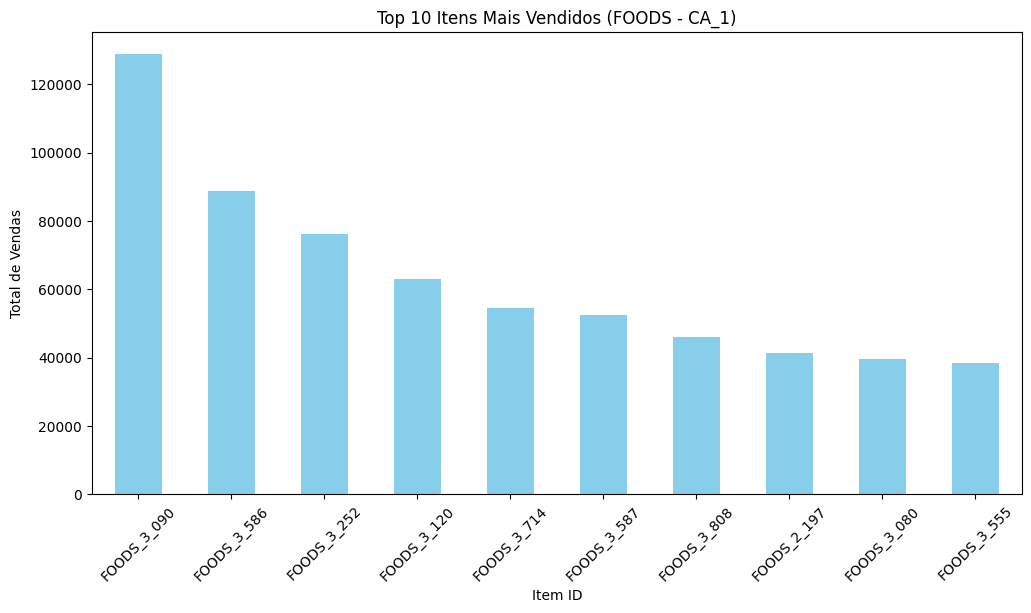

In [ ]:
vendas_por_item_foods = data_foods_ca1.groupby('item_id', observed=False)['value'].sum()


top_10_itens = vendas_por_item_foods.sort_values(ascending=False).head(10)

top_10_itens.plot(kind='bar', figsize=(12, 6), color='skyblue')

plt.title('Top 10 Itens Mais Vendidos (FOODS - CA_1)')
plt.xlabel('Item ID')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.show()

Análise:

- FOODS_3_090 é o item mais vendido, com um total de vendas superior a 120.000 unidades.
- FOODS_3_586 é o segundo item mais vendido, com cerca de 90.000 unidades vendidas.
- FOODS_3_252 ocupa a terceira posição, com vendas em torno de 75.000 unidades.
- FOODS_3_120 e FOODS_3_714 estão próximos, com vendas na faixa de 60.000 a 65.000 unidades.
- FOODS_3_587 tem um total de vendas ligeiramente menor, com cerca de 55.000 unidades.
- FOODS_3_808 e FOODS_2_197 estão em seguida, cada um com vendas entre 45.000 e 50.000 unidades.
- FOODS_3_080 e FOODS_3_555 fecham a lista dos 10 itens mais vendidos, com vendas próximas a 40.000 unidades.

Observações:

- Há uma diferença significativa nas vendas entre os itens mais vendidos (FOODS_3_090) e os menos vendidos desta lista (FOODS_3_555).
- Os itens FOODS_3_090 e FOODS_3_586 são claramente os mais populares.
- A distribuição de vendas entre os 10 itens mais vendidos mostra uma tendência decrescente clara.

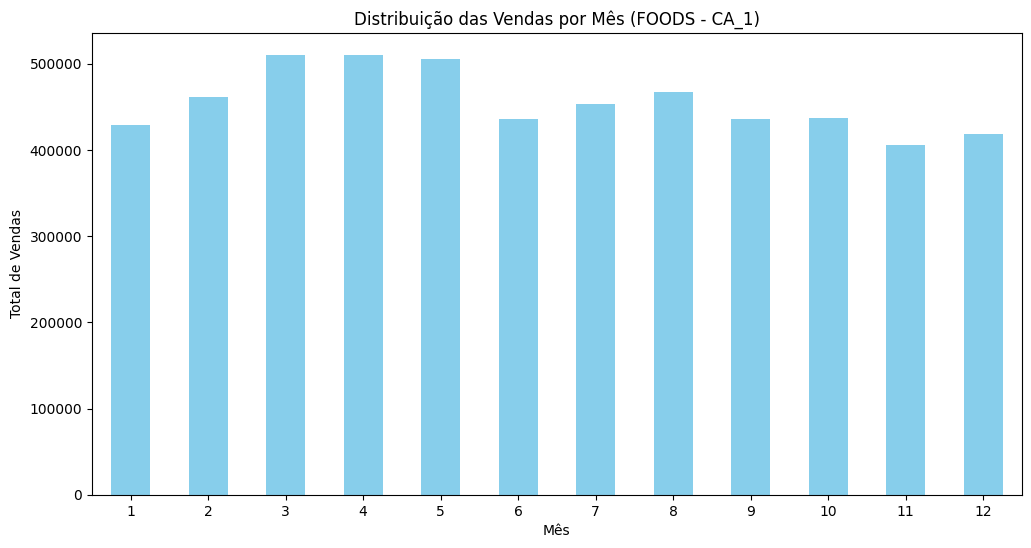

In [ ]:
# Agrupar por 'month' e somar os valores de vendas
vendas_por_mes_foods = data_foods_ca1.groupby('month')['value'].sum()

# Plotar a distribuição das vendas por mês
vendas_por_mes_foods.plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Distribuição das Vendas por Mês (FOODS - CA_1)')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=0)
plt.show()

A alta nos meses de março, abril e maio pode estar relacionada com feriados ou eventos sazonais que aumentam a demanda por certos produtos alimentares. Por exemplo, a Páscoa (que geralmente cai em abril) pode impulsionar as vendas de alimentos específicos. Promoções ou campanhas de marketing específicas durante os meses de março a maio podem ter contribuído para o aumento das vendas nesses meses.

Mudanças nos padrões de consumo ao longo do ano, como uma maior compra de certos alimentos antes do verão ou em preparação para a primavera, podem influenciar as vendas mensais.

A diminuição das vendas no final do ano (setembro a dezembro) pode ser atribuída a mudança climática (geralmente o inverno é nessa época), o que pode fazer com o que as pessoas frequentem menos os supermercados.

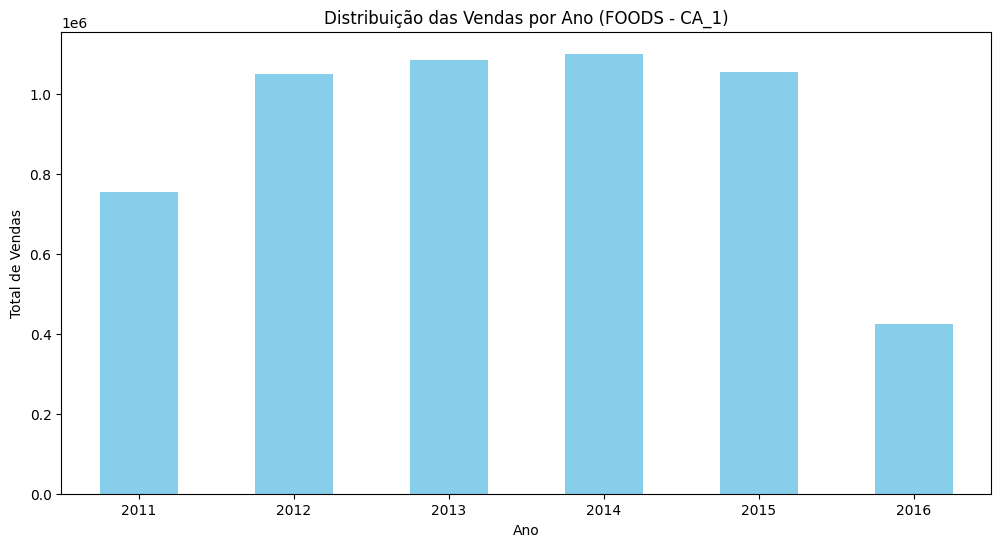

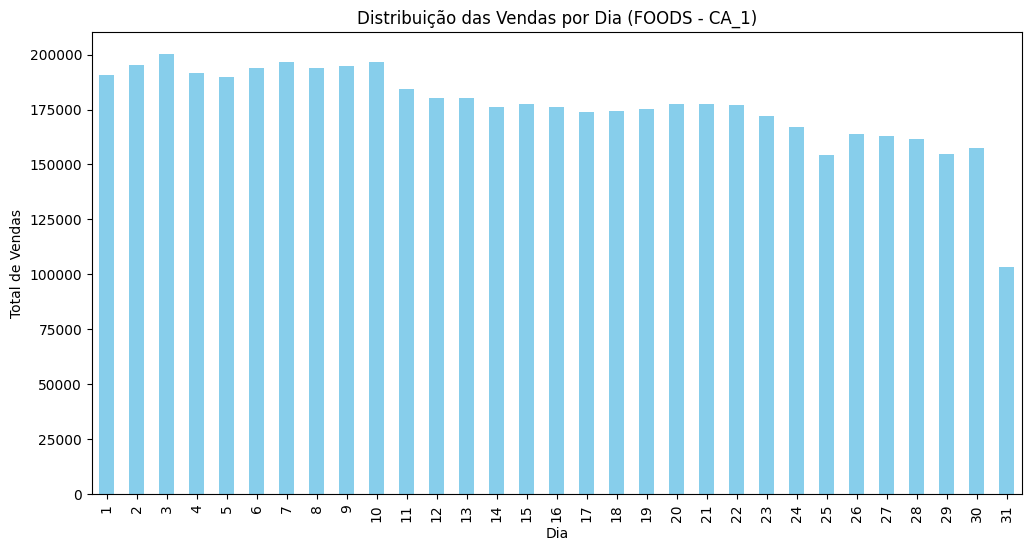

In [ ]:
vendas_por_anos_foods = data_foods_ca1.groupby('year')['value'].sum()

# Agrupar por 'day' e somar os valores de vendas
vendas_por_dia_foods = data_foods_ca1.groupby('day')['value'].sum()

# Plotar a distribuição das vendas por ano
plt.figure(figsize=(12, 6))
vendas_por_anos_foods.plot(kind='bar', color='skyblue')
plt.title('Distribuição das Vendas por Ano (FOODS - CA_1)')
plt.xlabel('Ano')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=0)
plt.show()

# Plotar a distribuição das vendas por dia
plt.figure(figsize=(12, 6))
vendas_por_dia_foods.plot(kind='bar', color='skyblue')
plt.title('Distribuição das Vendas por Dia (FOODS - CA_1)')
plt.xlabel('Dia')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=90)
plt.show()

 Vendas por Ano:

 - As vendas apresentaram uma tendência de crescimento de 2011 a 2014. Em 2015 há uma pequena queda nas vendas e já 2016 não há como dizer a existência de alta ou queda por a base de dados deste ano, não estar completa.

 - A introdução de novas técnicas de produção ou inovações pode ter aumentado a eficiência e a quantidade de produtos vendidos. Campanhas de marketing eficazes podem ter aumentado a conscientização e a demanda pelo produto.

 - Em relação a queda em 2015, o mercado pode ter atingido um ponto de saturação, onde a demanda começou a estabilizar ou diminuir.

Vendas por Dia:

- Há uma alternãncia de altos e baixos do dia 1 até o dia 10, talvez motivado pelo pode de compra do consumidor que recebe o salário no ínico do mês pode usa-lo para realizar compras nos dias iniciais do mesmo.

- Há queda que acontece apartir do dia 11, onde há uma alternância de altos e baixos, mas que não superaram os altos e baixos dos dias anteriores e isso permanece até o dia 31, onde é registrado o menor indìce de venda. Isso pode se dá pelos gastos em outros produtos além de alimentos que o consumidor necessita comprar, como também contas a pagar de serviçoes contradotos e etc. Isso faz com que ao longo da metade do mês até e até o fim do mesmo a quantidade de vendas comece a cair.


### Analisando parte de House - Loja CA1

In [ ]:
# Filtrar os dados onde cat_id é igual a 'HOUSEHOLD' e store_id é igual a 'CA_1'
data_household_ca1 = data[(data['cat_id'] == 'HOUSEHOLD') & (data['store_id'] == 'CA_1')]

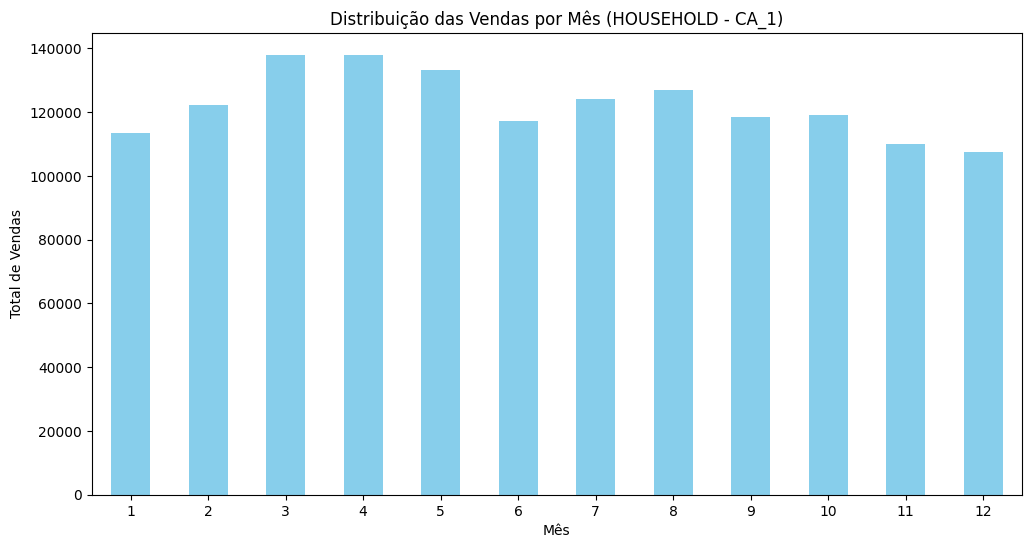

In [ ]:
# Agrupar por 'month' e somar os valores de vendas
vendas_por_mes_household = data_household_ca1.groupby('month')['value'].sum()

# Plotar a distribuição das vendas por mês
plt.figure(figsize=(12, 6))
vendas_por_mes_household.plot(kind='bar', color='skyblue')
plt.title('Distribuição das Vendas por Mês (HOUSEHOLD - CA_1)')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=0)
plt.show()

As vendas têm uma tendência de crescimento nos primeiros meses do ano, atingindo o pico em março e abril. Nesses mesos, e até o verão, observa-se um aumento nas vendas, isso pode ser devido ao aumento das atividades ao ar livre e à renovação doméstica típica da primavera, quando as pessoas compram itens para jardinagem, móveis de exterior e produtos de decoração.E a redução durante o outono e inverno, por as pessoas estarem propensas a ficar mais em casa nessas estações. Durante setembro e dezembro, as vendas tendem a diminuir. No entanto, eventos como o Halloween (outubro), Thanksgiving (novembro), e Natal (dezembro) ainda impulsionam a venda de itens específicos como decoração temática, utensílios de cozinha para preparo de refeições festivas, e aquecedores para o inverno.

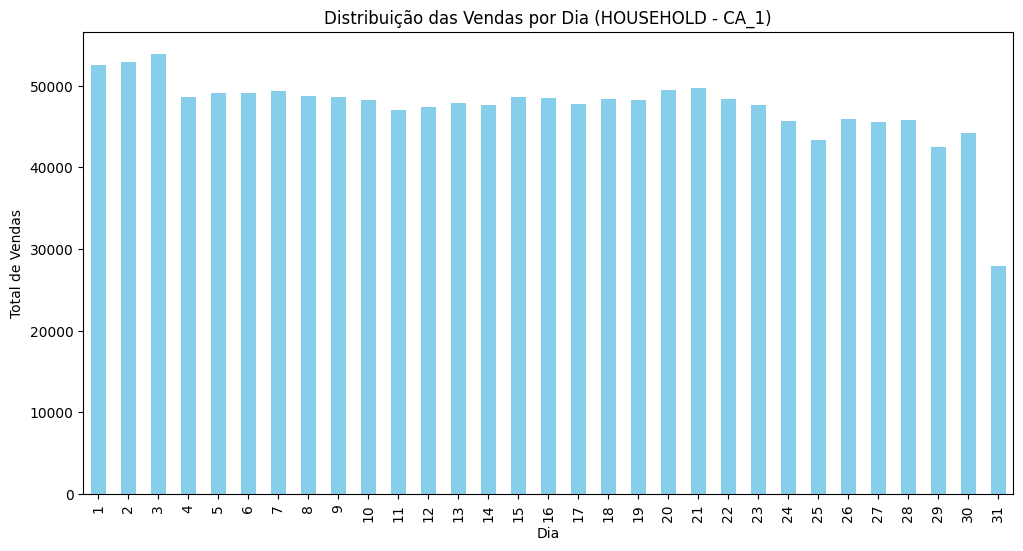

In [ ]:
# Agrupar por 'day' e somar os valores de vendas
vendas_por_dia_household = data_household_ca1.groupby('day')['value'].sum()

# Plotar a distribuição das vendas por dia
plt.figure(figsize=(12, 6))
vendas_por_dia_household.plot(kind='bar', color='skyblue')
plt.title('Distribuição das Vendas por Dia (HOUSEHOLD - CA_1)')
plt.xlabel('Dia')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=90)
plt.show()

A uma tendência de alta nas vendas nos 3 primeiros dias, posteriormente relacionado ao que foi comentado antes, sobre o poder de comprar do consumidor ser maior no ínicio do mês por conta do recebimento do salário. Após os 3 dias á uma alternância de altos e baixos nas vendas que é algo natural e no final do mês como o consumidor já fez suas compras nos dias iniciais refernte ao mês e tem outras contas a pagar, seu poder de compra diminui.

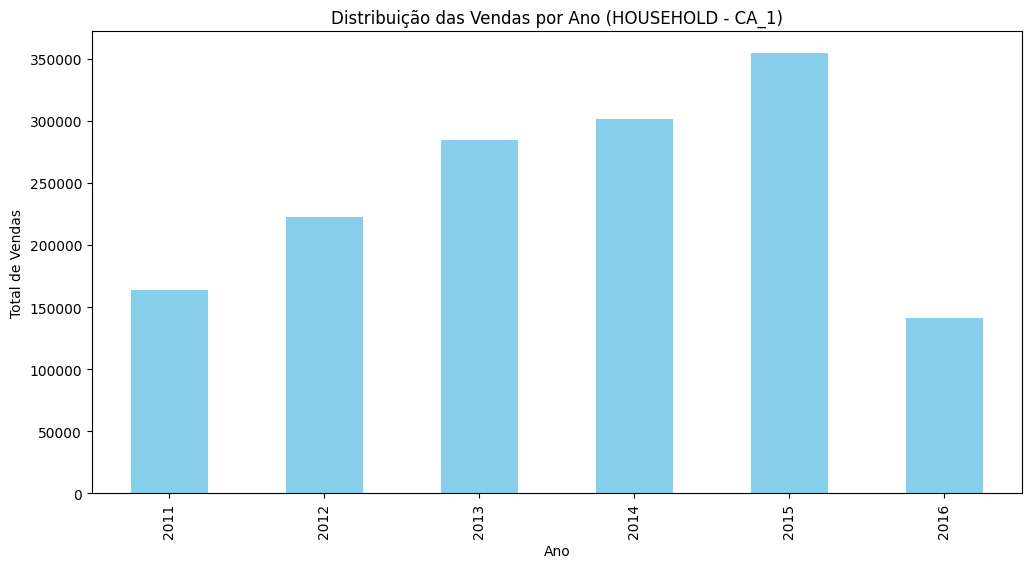

In [ ]:
# Agrupar por 'day' e somar os valores de vendas
vendas_por_dia_household = data_household_ca1.groupby('year')['value'].sum()

# Plotar a distribuição das vendas por dia
plt.figure(figsize=(12, 6))
vendas_por_dia_household.plot(kind='bar', color='skyblue')
plt.title('Distribuição das Vendas por Ano (HOUSEHOLD - CA_1)')
plt.xlabel('Ano')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=90)
plt.show()

- Desde 2011, as estratégias implementadas até 2015 parecem ter sido eficazes, resultando em um aumento consistente nas vendas. Em 2015 deve-se ter intensificado os esforços para competir com outros concorrentes, investindo em plataformas online e melhorando a experiência do cliente digitalmente.

- Em 2016, as vendas caíram drasticamente para um nível abaixo do registrado em qualquer outro ano mostrado no gráfico, estando abaixo do nível de 2011. No entanto, é importante notar que a base de dados não contém todas as informações do ano de 2016, apenas até maio de 2016.

### Análise Comparativa entre os dados da Loja CA1

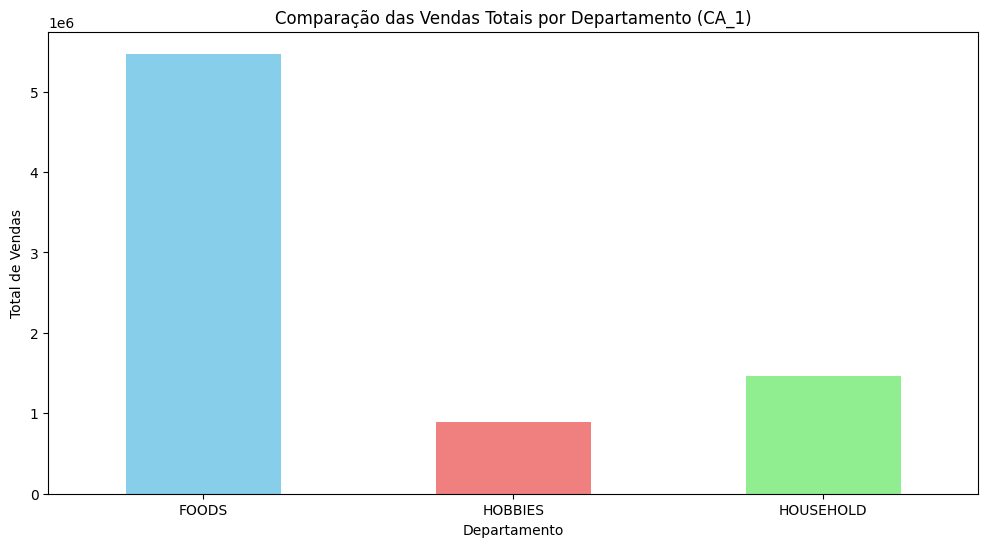

In [ ]:
# Filtrar os dados por store_id igual a 'CA_1'
data_ca1 = data[data['store_id'] == 'CA_1']

# Agrupar por 'cat_id' e somar os valores de vendas
vendas_por_departamento = data_ca1.groupby('cat_id', observed=True)['value'].sum()

#plotar a comparação das vendas totais por departamento
plt.figure(figsize=(12, 6))
vendas_por_departamento.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Comparação das Vendas Totais por Departamento (CA_1)')
plt.xlabel('Departamento')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=0)
plt.show()

Sobre o gráfico acima é possível notar que alimentos são necessidades diárias essenciais, portanto, o volume de vendas tende a ser significativamente mais alto. As pessoas compram alimentos com mais frequência do que outros itens, contribuindo para o volume total de vendas mais elevado.

Produtos relacionados a hobbies são geralmente considerados não essenciais e são comprados com menos frequência, especialmente durante tempos de restrições econômicas. O interesse por hobbies pode variar entre indivíduos e ao longo do tempo, o que pode influenciar negativamente as vendas.

Produtos domésticos são essenciais, mas não são comprados com a mesma frequência que alimentos. Por exemplo, itens como produtos de limpeza, móveis, e utensílios domésticos são comprados periodicamente. Os itens domésticos tendem a ter um ciclo de substituição mais longo, resultando em volumes de vendas menores em comparação com alimentos.

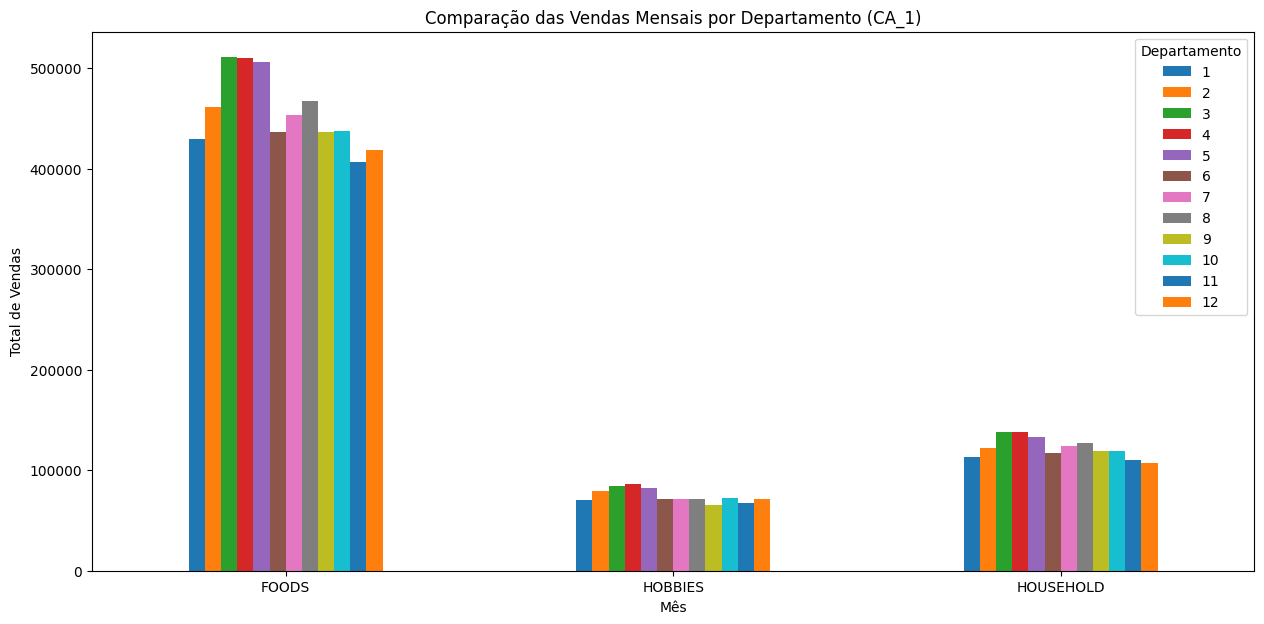

In [ ]:
# Agrupar por 'cat_id' e 'month' e somar os valores de vendas
vendas_mensais_por_departamento = data_ca1.groupby(['cat_id', 'month'], observed=False)['value'].sum().unstack()

# Plotar a comparação das vendas mensais por departamento
vendas_mensais_por_departamento.plot(kind='bar', figsize=(15, 7))
plt.title('Comparação das Vendas Mensais por Departamento (CA_1)')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=0)
plt.legend(title='Departamento')
plt.show()

Departamento de FOODS:

As vendas mensais são consistentemente altas, flutuando ligeiramente entre aproximadamente 400.000 e 550.000. Há uma leve variação entre os meses, mas todas as barras são relativamente próximas, indicando um consumo constante ao longo do ano. Alimentos são comprados regularmente, com pouca variação sazonal significativa, refletindo necessidades diárias constantes.

Departamento de HOBBIES:

As vendas mensais são significativamente mais baixas comparadas a FOODS e mais uniformes. Todas as barras estão em torno de 100.000, com variações mínimas entre os meses. Os produtos de hobbies são geralmente comprados com menos frequência e são mais suscetíveis a variações nas despesas discricionárias.

Departamento de HOUSEHOLD:

As vendas mensais são intermediárias entre FOODS e HOBBIES. As barras variam entre 100.000 e 200.000, com uma distribuição mais uniforme ao longo dos meses. Produtos domésticos são necessários, mas não com a mesma frequência que alimentos, resultando em uma demanda estável e previsível.

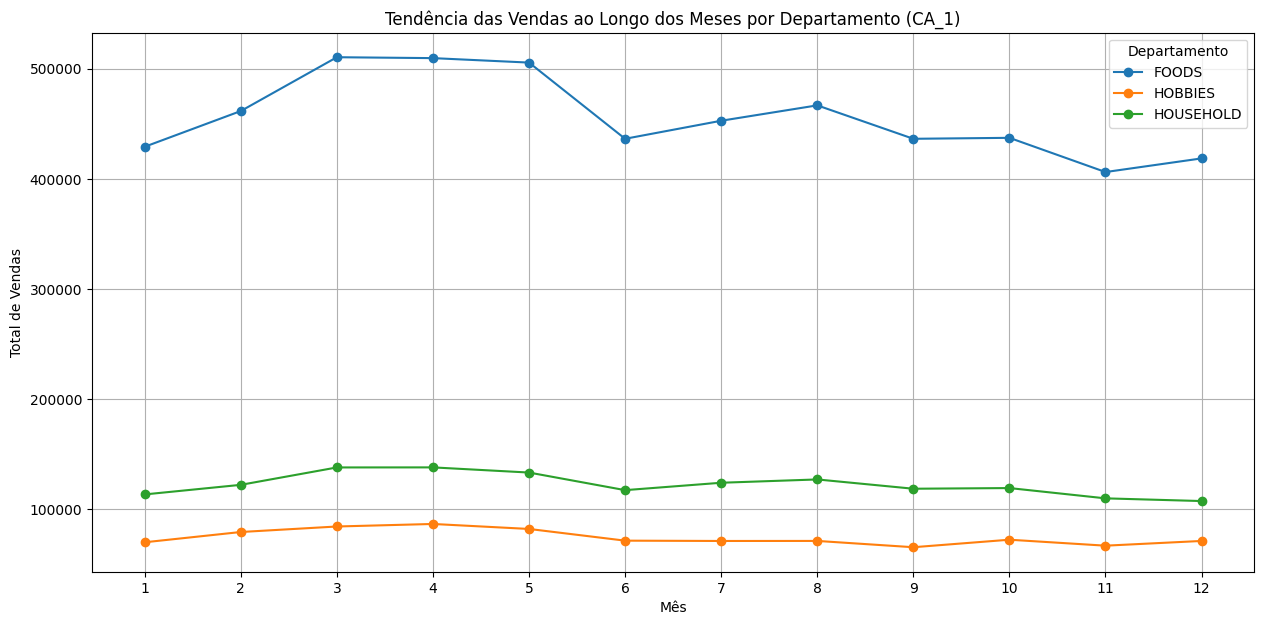

In [ ]:
vendas_mensais_por_departamento = data_ca1.groupby(['cat_id', 'month'], observed=False)['value'].sum().unstack()

#plotar a tendência das vendas ao longo dos meses por departamento
plt.figure(figsize=(15, 7))
for departamento in vendas_mensais_por_departamento.index:
    plt.plot(vendas_mensais_por_departamento.columns, vendas_mensais_por_departamento.loc[departamento], marker='o', label=departamento)

plt.title('Tendência das Vendas ao Longo dos Meses por Departamento (CA_1)')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(vendas_mensais_por_departamento.columns)
plt.legend(title='Departamento')
plt.grid(True)
plt.show()

Departamento de FOODS:

- O departamento de FOODS tem consistentemente o maior total de vendas em comparação com os outros dois departamentos.

- Há um pico notável nas vendas de março a junho, com as vendas atingindo cerca de 500.000.

- As vendas caem ligeiramente após este pico, mas permanecem acima de 400.000 pelo resto do ano, com um leve aumento em dezembro.


Departamento de HOUSEHOLD:

- O departamento de HOUSEHOLD tem vendas estáveis ao longo do ano, variando entre 100.000 e 120.000.

- Há uma leve tendência de aumento nas vendas de janeiro a maio, atingindo um pico de cerca de 120.000.

- As vendas caem ligeiramente em junho e depois mantêm uma tendência estável pelo restante do ano.


Departamento de HOBBIES:

- O departamento de HOBBIES tem consistentemente o menor total de vendas entre os três departamentos, com vendas em torno de 50.000 a 70.000.

- Há uma pequena tendência de aumento de janeiro a maio, seguida por uma leve queda no meio do ano.

- As vendas se estabilizam e permanecem relativamente constantes de julho a dezembro.

Outras observações:

Estabilidade nas Vendas: Os departamentos de HOUSEHOLD e HOBBIES exibem mais estabilidade ao longo do ano, com pequenas flutuações.

Comparação: O departamento de FOODS supera significativamente os outros departamentos, indicando uma maior demanda por itens alimentares em comparação com itens domésticos ou relacionados a hobbies.

### Vamos fazer a mesma análise para a loja CA2

In [ ]:
data_hobbies_ca2 = data[(data['cat_id'] == 'HOBBIES') & (data['store_id'] == 'CA_2')]

In [ ]:
data_hobbies_ca2 = data_hobbies[data_hobbies['store_id'] == 'CA_2']

# Agrupar por 'item_id' e somar os valores de vendas
vendas_por_item_2 = data_hobbies_ca2.groupby('item_id', observed=False)['value'].sum()

# Ordenar os itens por vendas em ordem decrescente
vendas_por_item_2 = vendas_por_item_2.sort_values(ascending=False)

print(vendas_por_item_2)

item_id
HOBBIES_1_015      14166
HOBBIES_1_348      11778
HOBBIES_1_370      10659
HOBBIES_1_404      10449
HOBBIES_1_371      10383
                   ...  
FOODS_3_348            0
FOODS_3_349            0
FOODS_3_350            0
FOODS_3_351            0
HOUSEHOLD_2_516        0
Name: value, Length: 3049, dtype: int16


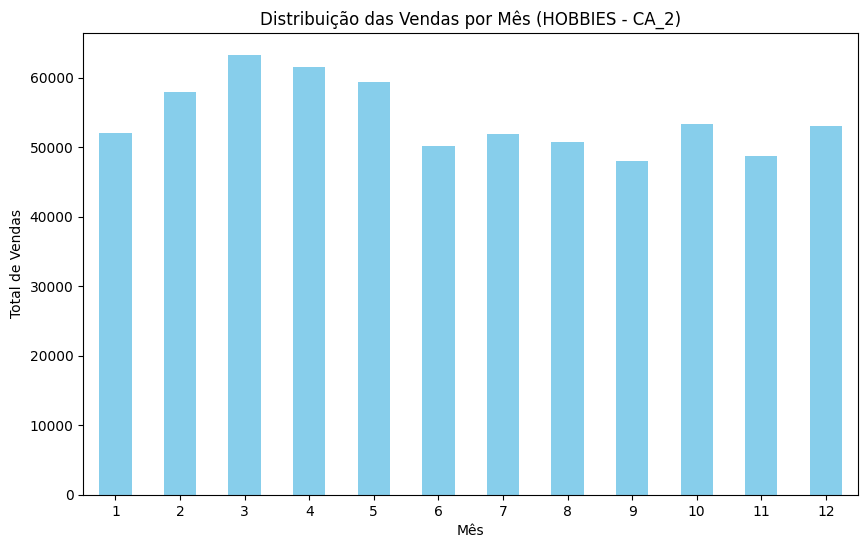

In [ ]:
data_hobbies_ca2 = data_hobbies[data_hobbies['store_id'] == 'CA_2']

# Agrupar por 'month' e somar os valores de vendas
vendas_por_mes_2= data_hobbies_ca2.groupby('month')['value'].sum()

# Opcional: Plotar a distribuição das vendas por mês
import matplotlib.pyplot as plt

vendas_por_mes_2.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Distribuição das Vendas por Mês (HOBBIES - CA_2)')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=0)
plt.show()

- Existe uma crescente de vendas nos meses iniciais pode ter relação com a passagem das festividades de ano novo, quando muitas pessoas decidem começar novos hobbies ou retomar antigos.
- De abril a junho, a queda nas vendas pode estar associada ao término do primeiro trimestre do ano, onde o entusiasmo inicial das resoluções de ano novo diminui. De julho até setembro há uma queda nas vendas, por muitos consumidores tiram férias durante o verão, o que pode reduzir o tempo e o dinheiro disponíveis para gastar em hobbies. As pessoas tendem a gastar mais em viagens e atividades ao ar livre durante este período.  Já a variabilidade nas vendas de outubro a dezembro, pode estar relacionada às compras de fim de ano e aos preparativos para as festas, onde alguns meses podem ter promoções ou eventos específicos que atraem mais consumidores.

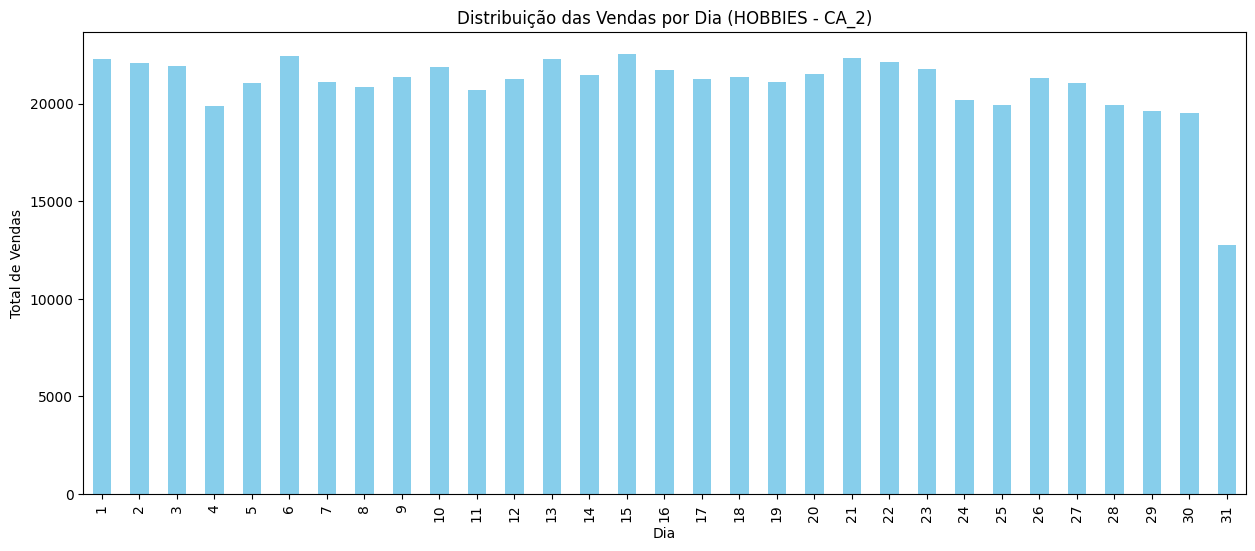

In [ ]:
vendas_por_dia_2 = data_hobbies_ca2.groupby('day')['value'].sum()

vendas_por_dia_2.plot(kind='bar', figsize=(15, 6), color='skyblue')
plt.title('Distribuição das Vendas por Dia (HOBBIES - CA_2)')
plt.xlabel('Dia')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=90)
plt.show()

- Nos primeiros dias do mês onde os consumidores recebem seus salários o poder de compra é maior para gastar com produtos de passatempo, seguindo os dias, acontece uma variância normal da compra desses produtos, onde as pessoas tendem a escolher outros dias para fazerem compras e no final do mês, onde o poder de compra diminui por terem gastos durante o restante do mês, acontece uma queda nas compras de produtos que não são essenciais.

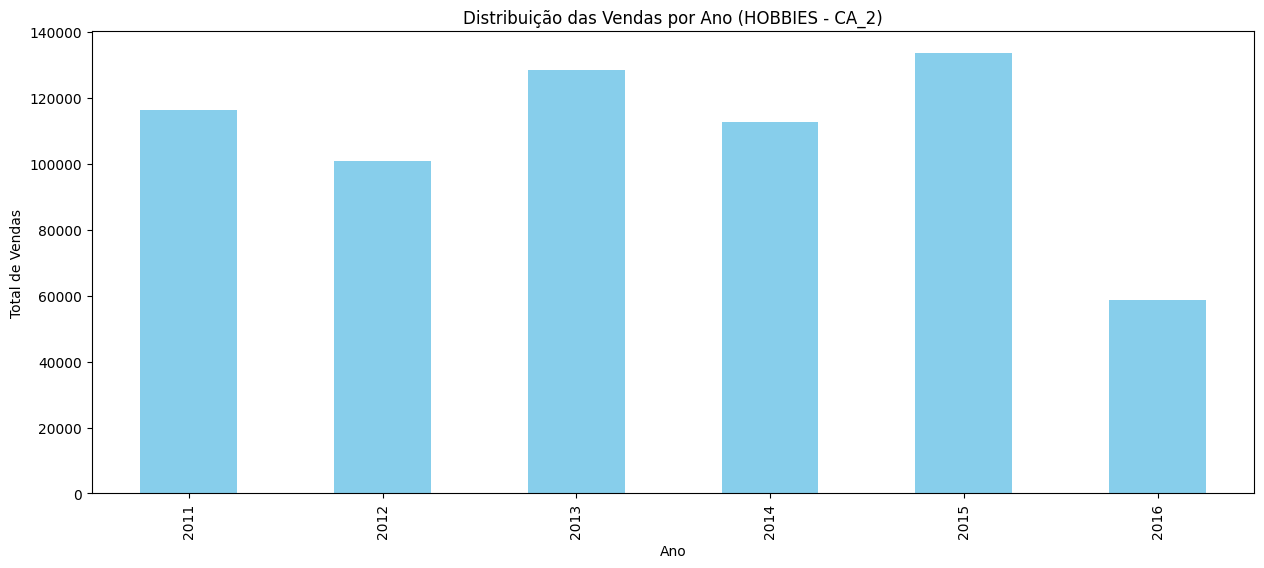

In [ ]:
vendas_por_dia_2 = data_hobbies_ca2.groupby('year')['value'].sum()

vendas_por_dia_2.plot(kind='bar', figsize=(15, 6), color='skyblue')
plt.title('Distribuição das Vendas por Ano (HOBBIES - CA_2)')
plt.xlabel('Ano')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=90)
plt.show()

- É possível notar uma variância de altos e baixos nas vendas, com um aumentobem considerável nos anos de 2013 e 2015, talvez devido a estratégia de marketing e promoções ofertadas pela loja que alavancaram as vendas nesses respectivos anos, já em relação a baixa de produtos em 2016, deva ser porque para esse ano, não estão disponíveis os meses restantes do ano, o que dá a impressão das vendas terem sido baixas.

In [ ]:
data_foods_ca2 = data[(data['cat_id'] == 'FOODS') & (data['store_id'] == 'CA_2')]

# Mostrar os primeiros registros do DataFrame filtrado para verificação
print(data_foods_ca2.head())

                               id      item_id  dept_id cat_id store_id  \
4661  FOODS_1_001_CA_2_evaluation  FOODS_1_001  FOODS_1  FOODS     CA_2   
4662  FOODS_1_002_CA_2_evaluation  FOODS_1_002  FOODS_1  FOODS     CA_2   
4663  FOODS_1_003_CA_2_evaluation  FOODS_1_003  FOODS_1  FOODS     CA_2   
4664  FOODS_1_004_CA_2_evaluation  FOODS_1_004  FOODS_1  FOODS     CA_2   
4665  FOODS_1_005_CA_2_evaluation  FOODS_1_005  FOODS_1  FOODS     CA_2   

     state_id  value       date  year  month  day  day_of_week  
4661       CA      2 2011-01-29  2011      1   29            5  
4662       CA      2 2011-01-29  2011      1   29            5  
4663       CA      8 2011-01-29  2011      1   29            5  
4664       CA      0 2011-01-29  2011      1   29            5  
4665       CA      8 2011-01-29  2011      1   29            5  


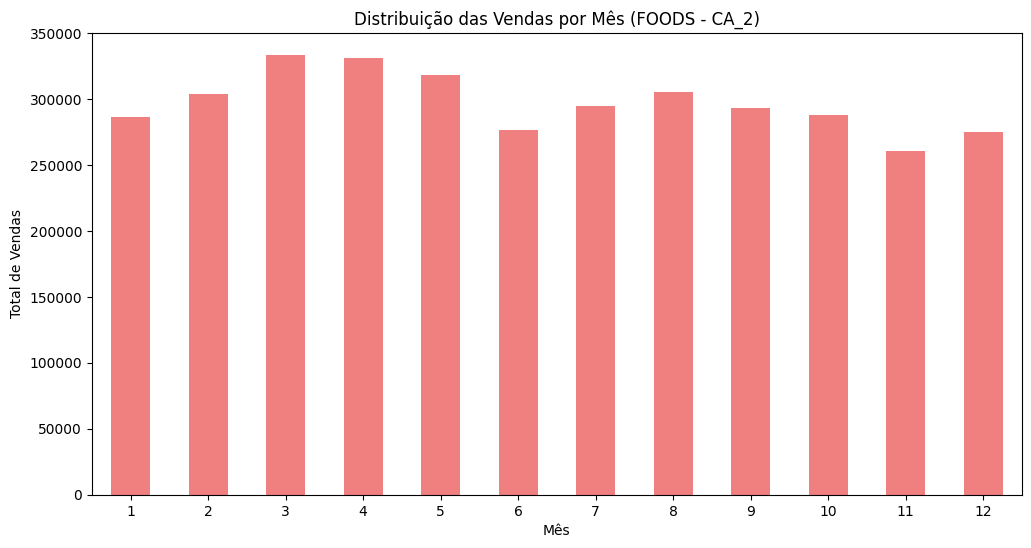

In [ ]:
# Agrupar por 'month' e somar os valores de vendas
vendas_por_mes_foods_ca2 = data_foods_ca2.groupby('month')['value'].sum()

# Plotar a distribuição das vendas por mês
plt.figure(figsize=(12, 6))
vendas_por_mes_foods_ca2.plot(kind='bar', color='lightcoral')
plt.title('Distribuição das Vendas por Mês (FOODS - CA_2)')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=0)
plt.show()

- Março a junho: Isso pode ser explicado pelo aumento das atividades ao ar livre, como piqueniques e churrascos, que incentivam a compra de alimentos frescos e bebidas.
- Verão(junho a agosto): As vendas permanecem fortes, possivelmente devido a eventos sociais, festas ao ar livre e férias escolares, que aumentam o consumo de alimentos.
- Setembro a novembro: embora as vendas sejam menores em comparação aos meses de primavera e verão, ainda permanecem relativamente fortes devido ao Dia de Ação de Graças em novembro, que incentiva a compra de grandes quantidades de alimentos.

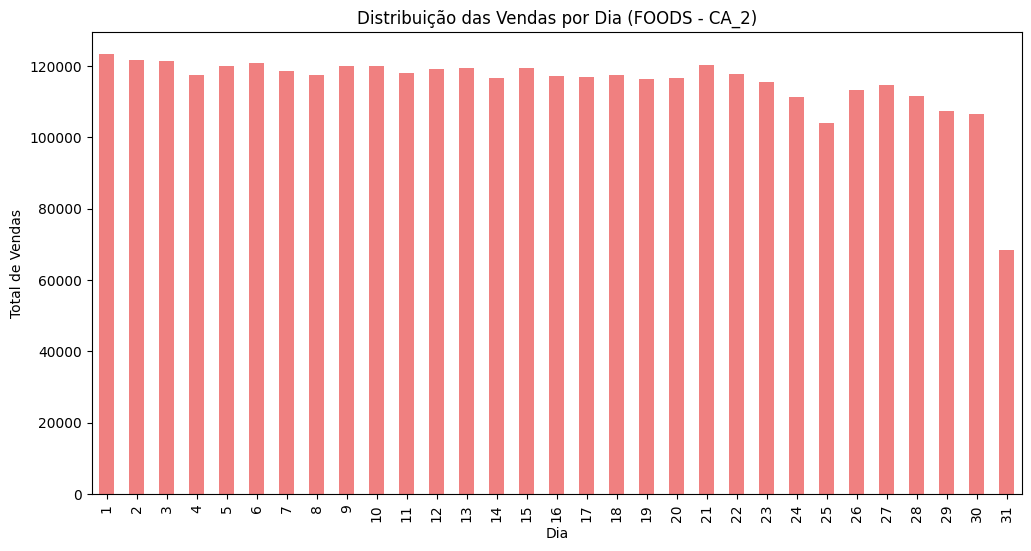

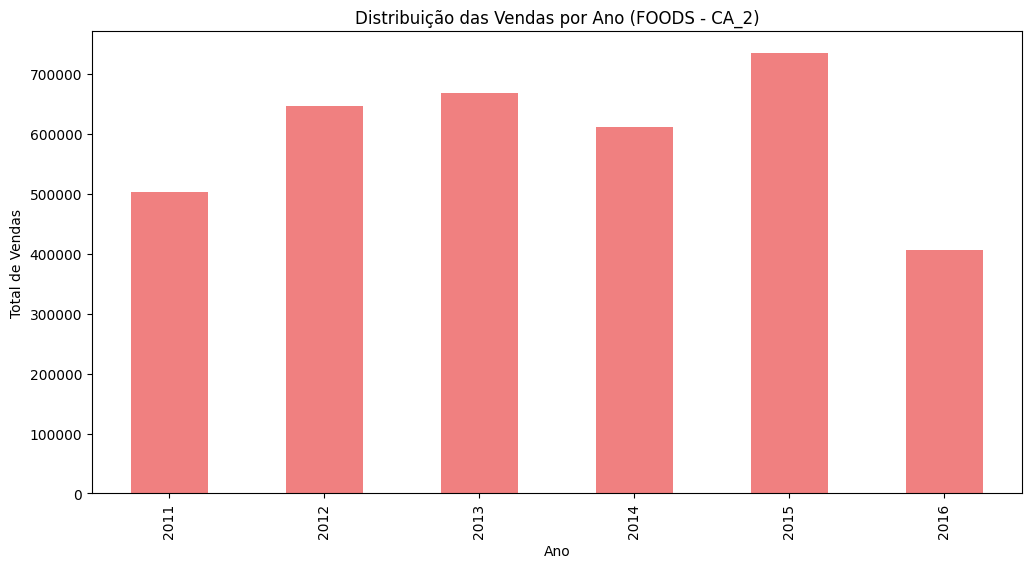

In [ ]:
# Agrupar por 'day' e somar os valores de vendas
vendas_por_dia_foods_ca2 = data_foods_ca2.groupby('day')['value'].sum()

# Plotar a distribuição das vendas por dia
plt.figure(figsize=(12, 6))
vendas_por_dia_foods_ca2.plot(kind='bar', color='lightcoral')
plt.title('Distribuição das Vendas por Dia (FOODS - CA_2)')
plt.xlabel('Dia')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=90)
plt.show()
# Agrupar por 'day' e somar os valores de vendas
vendas_por_dia_foods_ca2 = data_foods_ca2.groupby('year')['value'].sum()

# Plotar a distribuição das vendas por dia
plt.figure(figsize=(12, 6))
vendas_por_dia_foods_ca2.plot(kind='bar', color='lightcoral')
plt.title('Distribuição das Vendas por Ano (FOODS - CA_2)')
plt.xlabel('Ano')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=90)
plt.show()

Distribuição de vendas de comida por dia

- As vendas são  bastante consistentes ao longo dos dias, com uma leve variação entre os dias. Ressaltando que a queda sempre ocorre no final do mês onde o dinheiro gasto do consumidor foi em relação as compras feitas no início do mês e pela metade dele, o que evidencia uma grande quantidade de vendas nesses dias como mostra o gráfico.

- Insight: Devido à consistência nas vendas, o planejamento de estoque pode ser mantido de forma estável ao longo do mês, com uma atenção especial para garantir estoques suficientes no início e no final do mês.

Distribuição de vendas de comida por ano

- De 2011 a 2015 há uma alternância de vendas, onde tem-se seus altos e baixos, devidos as estratégias de marketing que foram usadas, onde por exemplo em 2015 foi bastante eficaz, fazendo com que o mesmo fosse o melhor ano de vendas da loja. Já em 2016, aparenta estar baixo, porém as informações que se possui, não são do ano inteiro, pode-se cogitar que a quantidade de vendas subiria consideravelmente, tendo em vista que a quantidade de vendas está aumentando e se aproximando de 2011 a qual foi o menor número de quantidade de vendas no ano todo.

In [ ]:
data_household_ca2 = data[(data['cat_id'] == 'HOUSEHOLD') & (data['store_id'] == 'CA_2')]

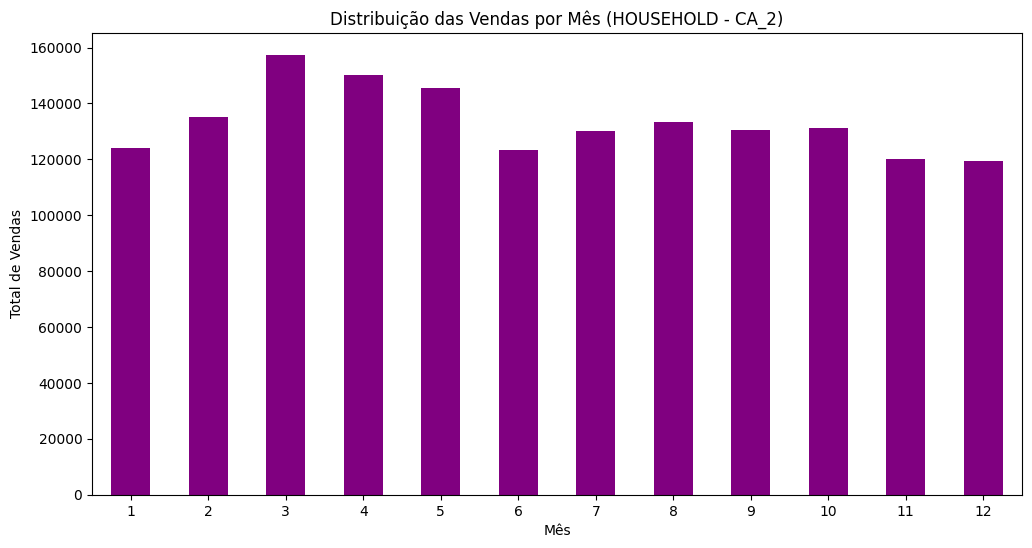

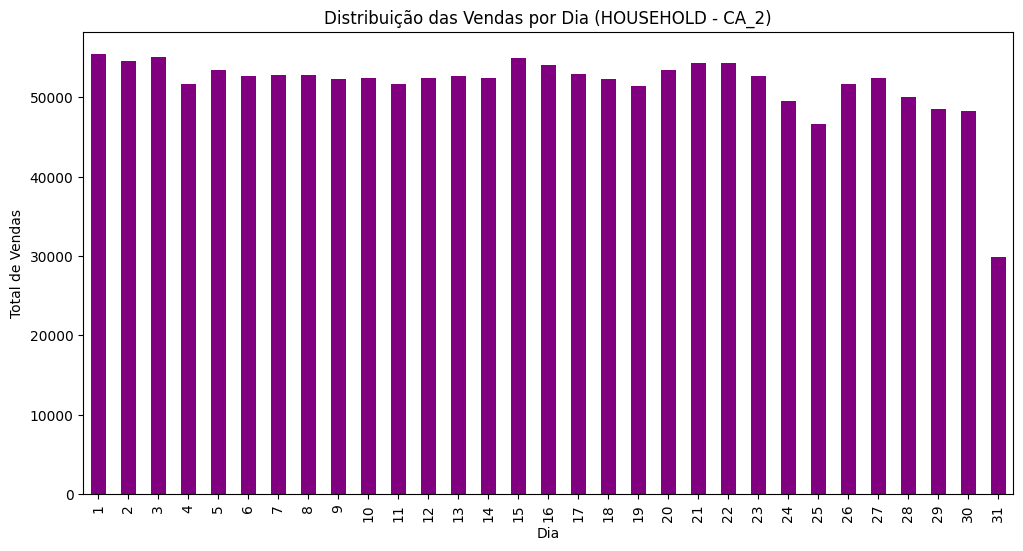

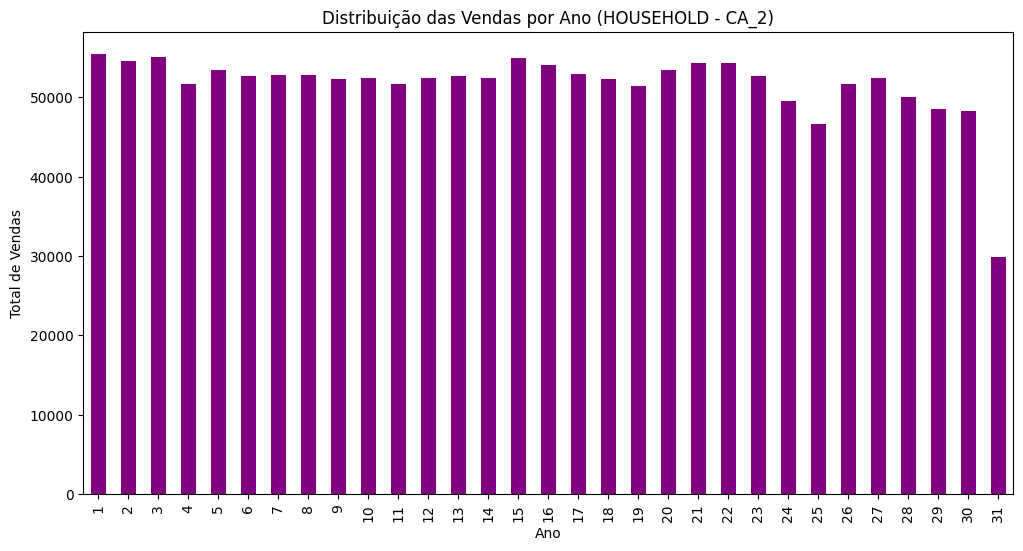

In [ ]:
# Agrupar por 'month' e somar os valores de vendas
vendas_por_mes_household_ca2 = data_household_ca2.groupby('month')['value'].sum()

# Plotar a distribuição das vendas por mês
plt.figure(figsize=(12, 6))
vendas_por_mes_household_ca2.plot(kind='bar', color='purple')
plt.title('Distribuição das Vendas por Mês (HOUSEHOLD - CA_2)')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=0)
plt.show()
# Agrupar por 'day' e somar os valores de vendas
vendas_por_dia_household_ca2 = data_household_ca2.groupby('day')['value'].sum()

# Plotar a distribuição das vendas por dia
plt.figure(figsize=(12, 6))
vendas_por_dia_household_ca2.plot(kind='bar', color='purple')
plt.title('Distribuição das Vendas por Dia (HOUSEHOLD - CA_2)')
plt.xlabel('Dia')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=90)
plt.show()# Agrupar por 'day' e somar os valores de vendas
vendas_por_dia_household_ca2 = data_household_ca2.groupby('day')['value'].sum()

# Plotar a distribuição das vendas por dia
plt.figure(figsize=(12, 6))
vendas_por_dia_household_ca2.plot(kind='bar', color='purple')
plt.title('Distribuição das Vendas por Ano (HOUSEHOLD - CA_2)')
plt.xlabel('Ano')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=90)
plt.show()

Distribuição de Vendas por Mês

 - Os meses de março a junho tem aumento das atividades de renovação e decoração de casas, típicas da primavera, quando as pessoas se preparam para o clima mais quente e gastam mais em produtos como móveis de exterior, artigos de jardinagem e itens de decoração.
 - Observa-se uma queda notável nas vendas durante os meses de junho e dezembro. Isso pode ser devido a vários fatores, como comportamento do consumidor, nesses mesmos meses o consumidor não tende a comprar itens para casa e acaba por comprar outros itens ou em outras lojas. Existe também possíveis estratégias de marketing e promoção que não foram tão eficazes nesses meses.
 - Embora haja variações, os meses de janeiro, fevereiro, maio, julho, agosto, setembro, outubro e novembro apresentam vendas relativamente consistentes, sugerindo um padrão de demanda estável fora dos períodos de pico e queda.

Distribuição de Vendas por dia

  - Do início do mês até um pouco mais de sua metade, há evidências de que a venda de produtos de casa aumenta significativamente, obtendo uma queda somente ao final do mês. o recebimento do salário no início do mês colaboram para que consumidores tenham dinheiro para comprar produto relacionados uso em casa.

  
Distribuição de Vendas por Ano

- Entre 2011 e 2015, as vendas apresentaram oscilações, com períodos de altas e baixas, influenciadas pelas estratégias de marketing adotadas. Em 2015, por exemplo, essas estratégias foram bastante eficazes, resultando no melhor ano de vendas da loja. Em 2016, as vendas parecem estar em declínio, mas os dados disponíveis não abrangem o ano inteiro. É possível que as vendas aumentem significativamente, considerando que o volume está crescendo e se aproximando dos números de 2011, que registrou o menor volume de vendas no ano todo.

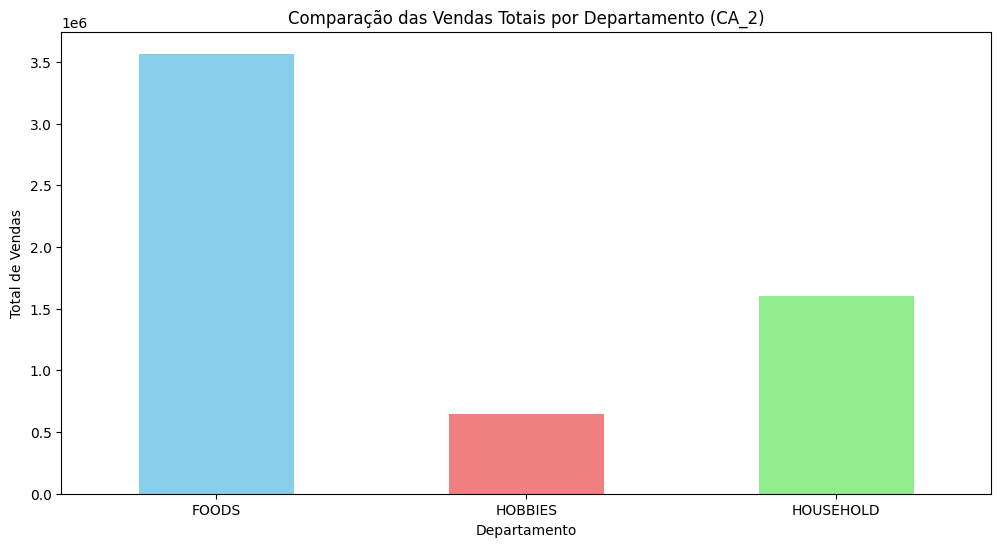

In [ ]:
# Supondo que o DataFrame já esteja carregado e se chama df
# Filtrar os dados por store_id igual a 'CA_2'
data_ca2 = data[data['store_id'] == 'CA_2']

# Agrupar por 'cat_id' e somar os valores de vendas
vendas_por_departamento_ca2 = data_ca2.groupby('cat_id', observed=False)['value'].sum()

# Plotar a comparação das vendas totais por departamento
plt.figure(figsize=(12, 6))
vendas_por_departamento_ca2.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.title('Comparação das Vendas Totais por Departamento (CA_2)')
plt.xlabel('Departamento')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=0)
plt.show()


Departamento FOODS:

- Este departamento possui o maior volume de vendas, com aproximadamente 3,5 milhões de unidades vendidas.

Departamento HOUSEHOLD:

- O segundo maior volume de vendas, com cerca de 1,5 milhão de unidades vendidas.

Departamento HOBBIES:

- O departamento com o menor volume de vendas, com menos de 1 milhão de unidades vendidas.


Análise:

- O departamento de FOODS domina claramente as vendas, sugerindo uma maior demanda ou um maior consumo de produtos alimentícios na área CA_2.

- Os produtos HOUSEHOLD também têm uma boa performance, mas significativamente menor do que alimentos.

- Os HOBBIES têm a menor participação nas vendas, indicando que estes produtos são menos procurados ou consumidos na área em questão.

<Figure size 2000x1200 with 0 Axes>

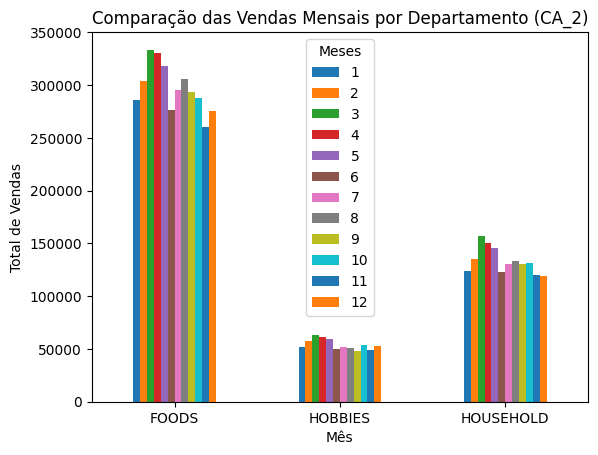

In [ ]:
# Agrupar por 'cat_id' e 'month' e somar os valores de vendas
vendas_mensais_por_departamento_ca2 = data_ca2.groupby(['cat_id', 'month'], observed=False)['value'].sum().unstack()

# Plotar a comparação das vendas mensais por departamento
plt.figure(figsize=(20, 12))
vendas_mensais_por_departamento_ca2.plot(kind='bar')
plt.title('Comparação das Vendas Mensais por Departamento (CA_2)')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=0)
plt.legend(title='Meses')
plt.show()


Departamento FOODS:

- As vendas mensais neste departamento variam entre pouco mais 250.000 e aproximadamente 350.000 unidades.

Departamento HOBBIES:

- As vendas mensais são significativamente menores, variando entre 30.000 e pouco mais 50.000 unidades.

As vendas são mais uniformes ao longo dos meses, sem grandes picos ou quedas.

Departamento HOUSEHOLD:

- As vendas mensais variam entre um pouco mais de 100.000 e aproximadamente 150.000 unidades.

- Há alguma variação nas vendas ao longo dos meses, mas menos pronunciada do que no departamento de FOODS.

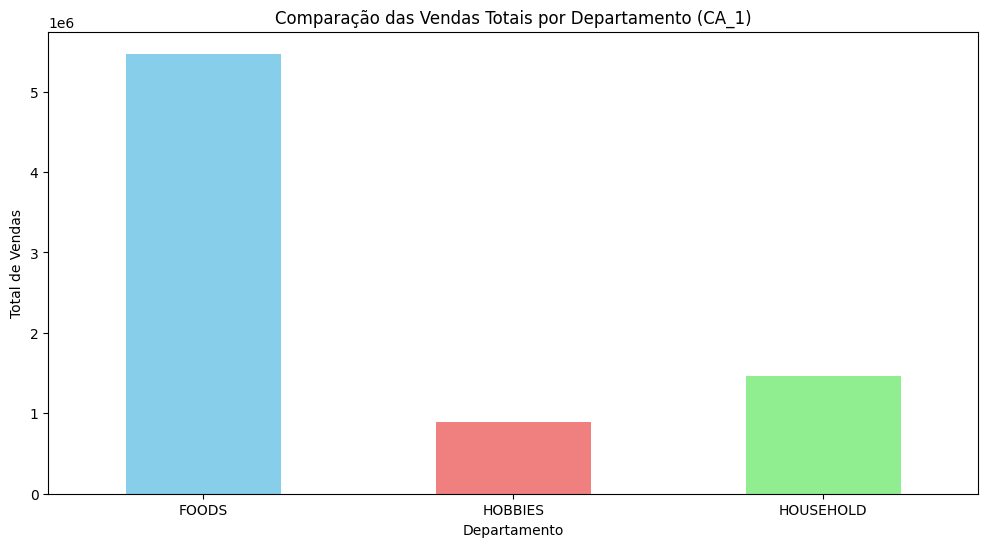

<Figure size 1500x700 with 0 Axes>

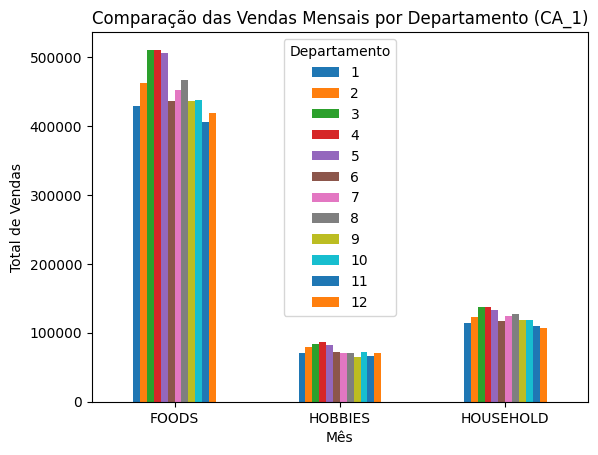

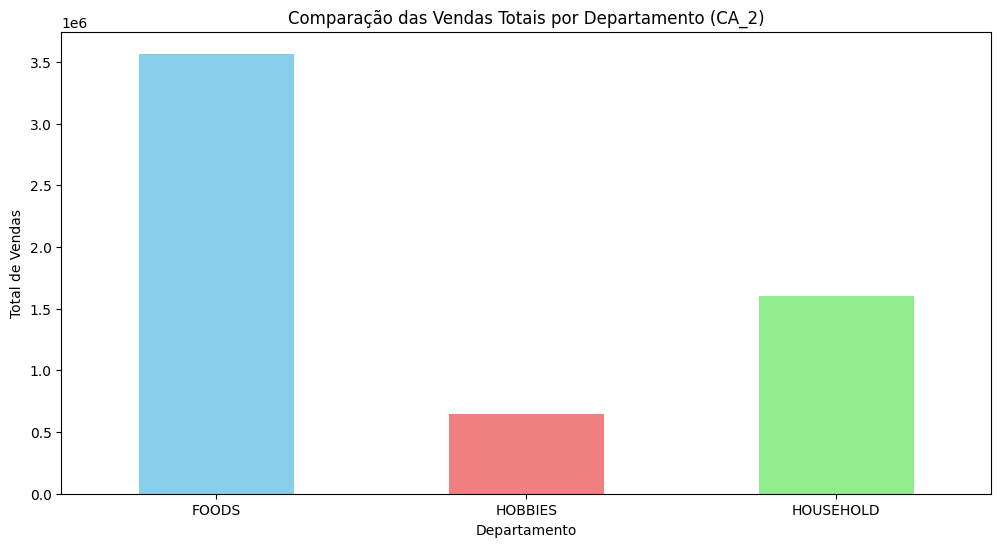

<Figure size 1500x700 with 0 Axes>

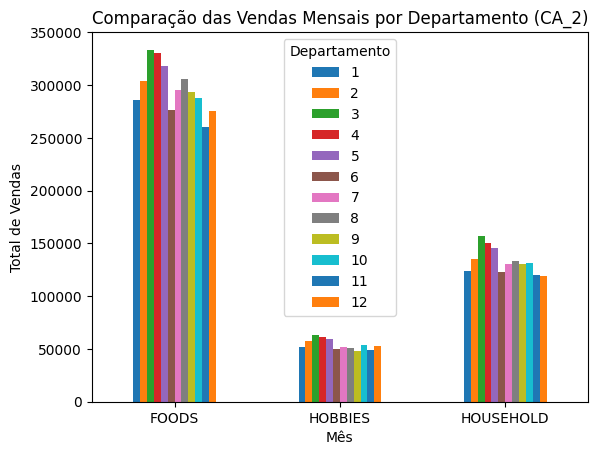

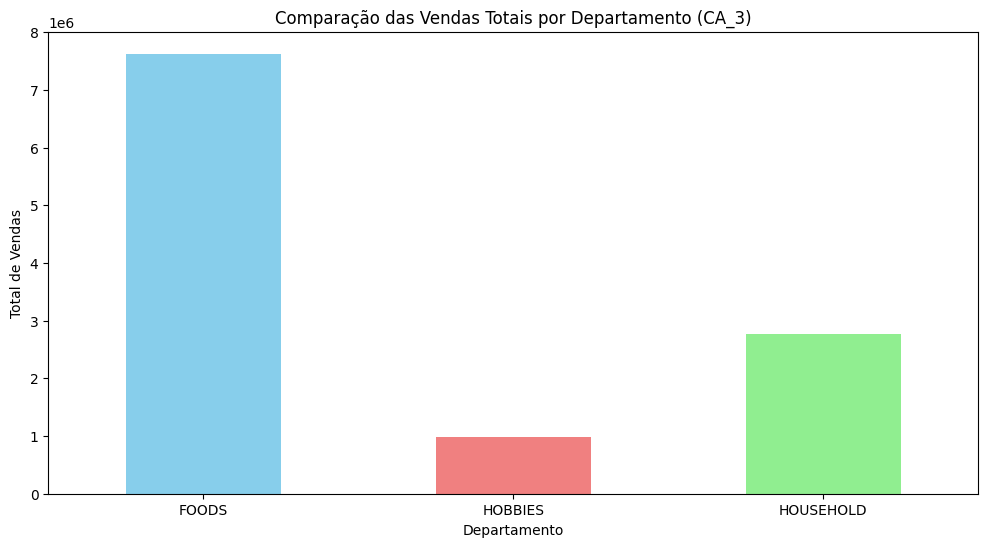

<Figure size 1500x700 with 0 Axes>

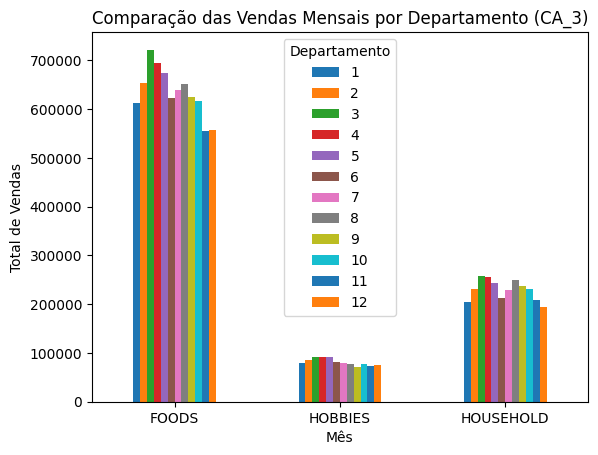

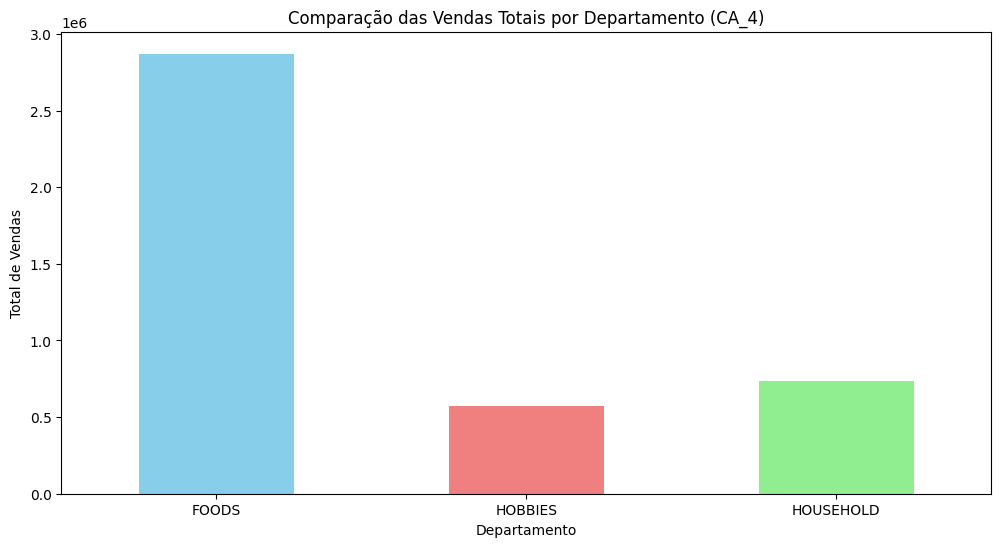

<Figure size 1500x700 with 0 Axes>

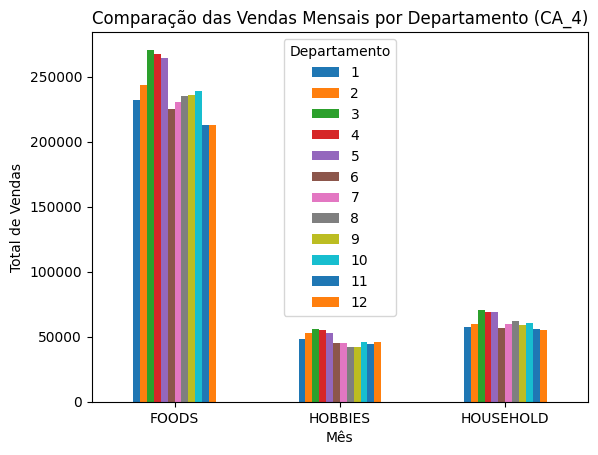

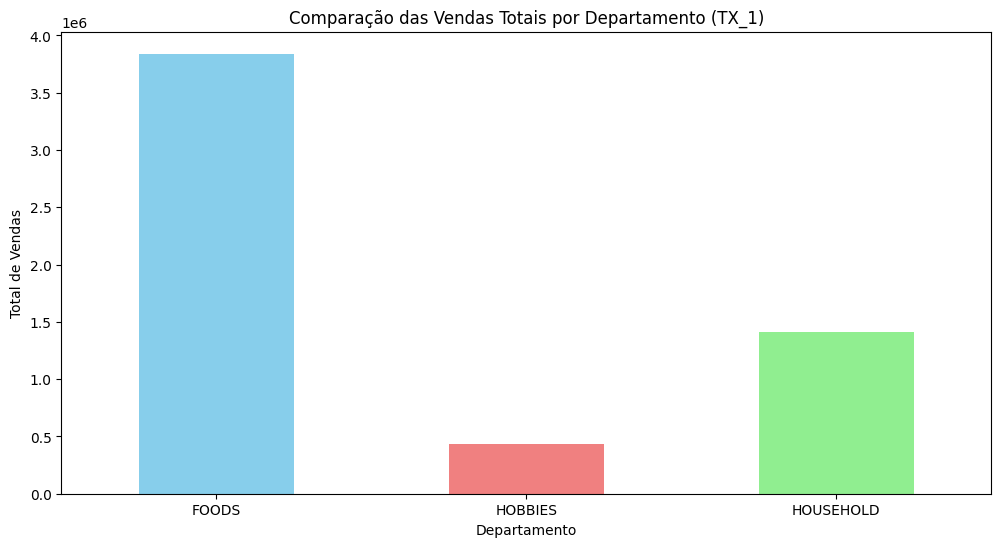

<Figure size 1500x700 with 0 Axes>

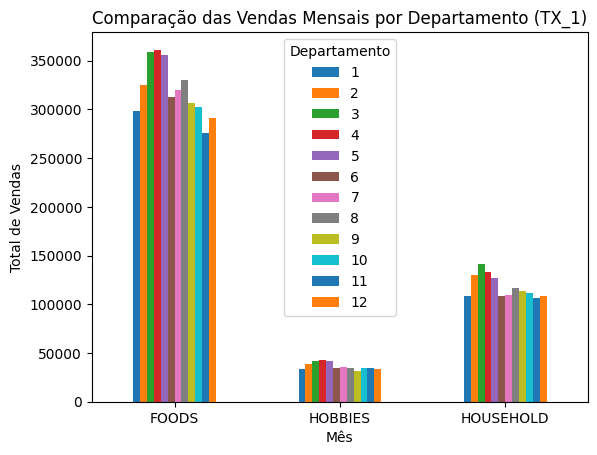

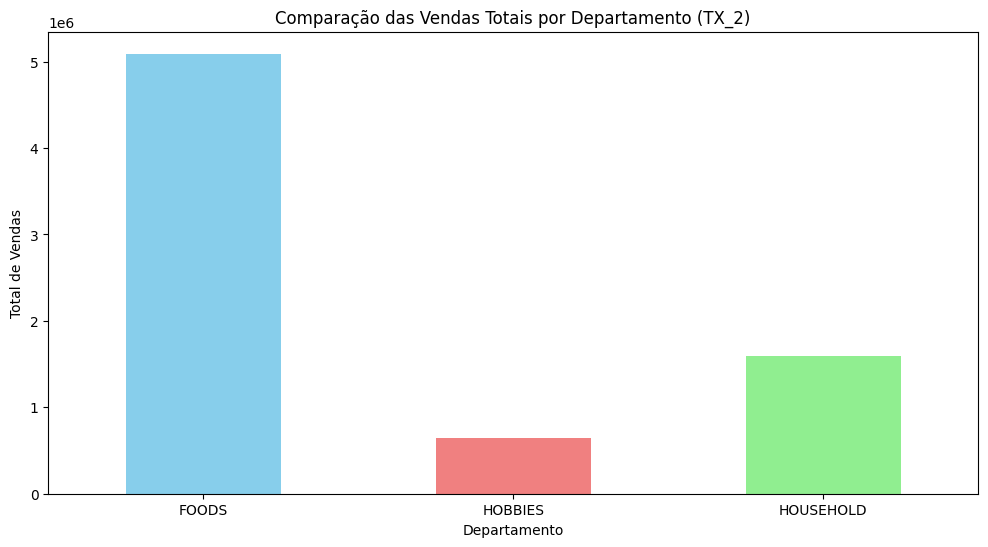

<Figure size 1500x700 with 0 Axes>

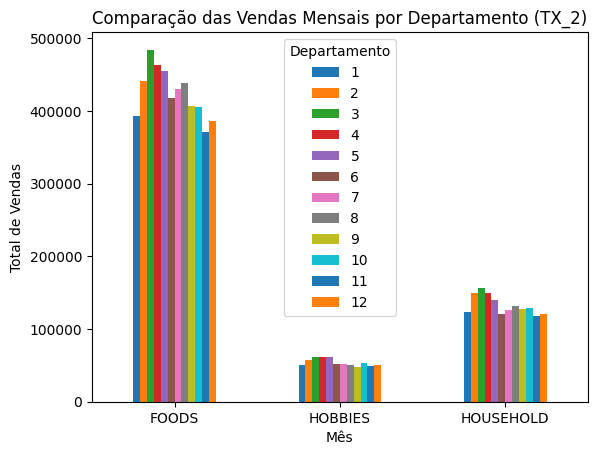

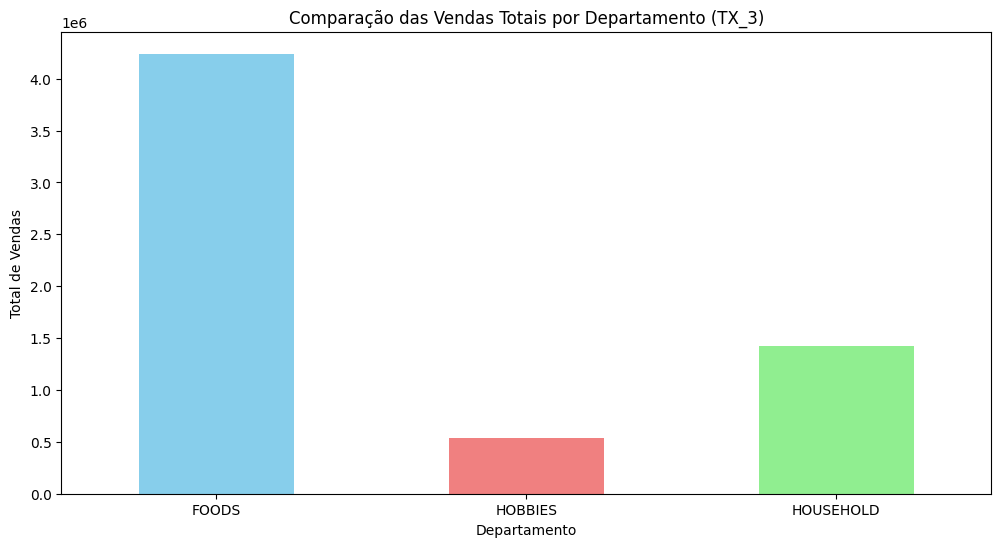

<Figure size 1500x700 with 0 Axes>

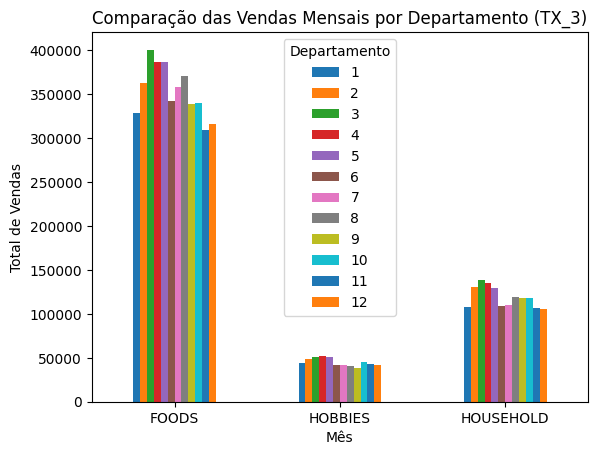

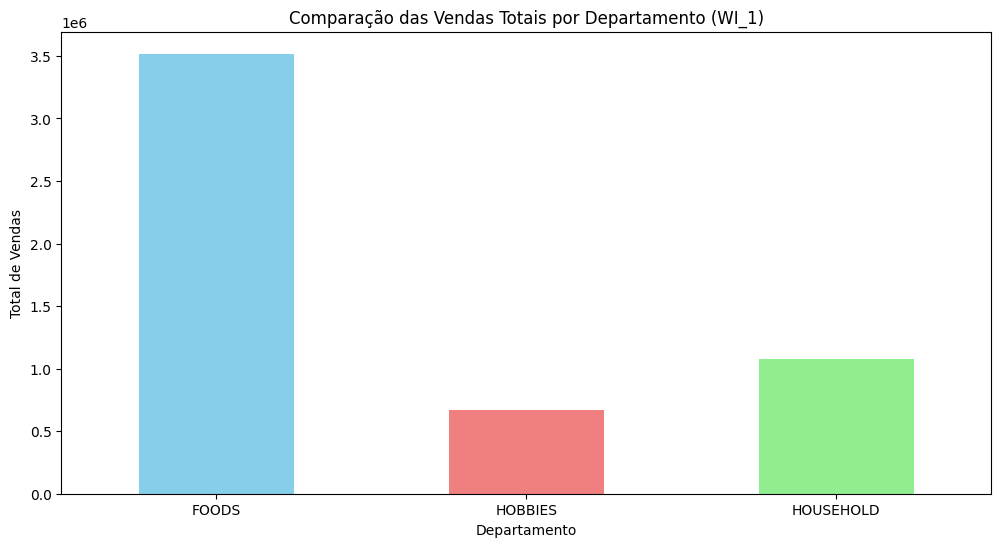

<Figure size 1500x700 with 0 Axes>

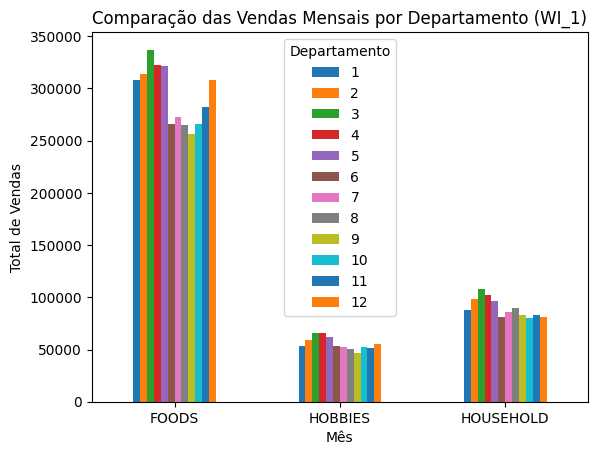

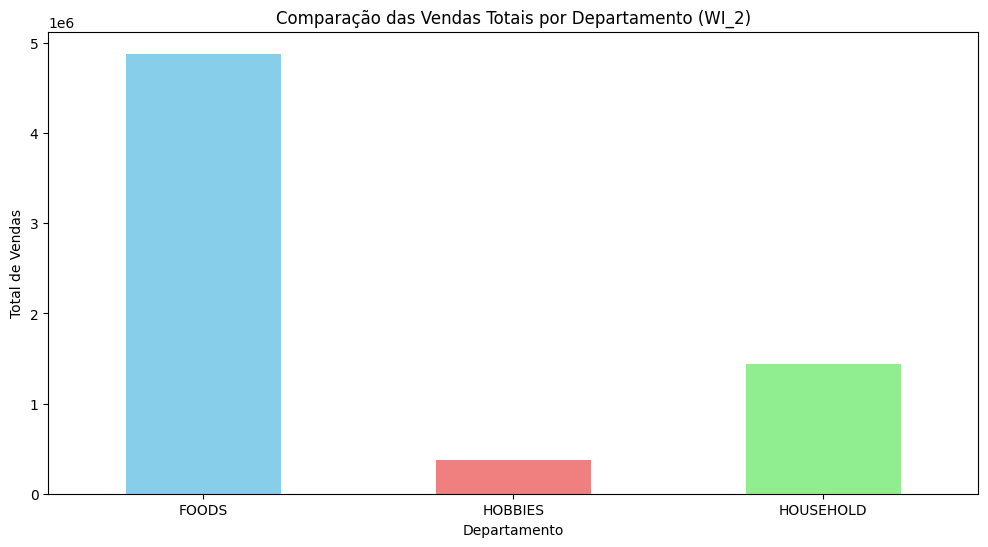

<Figure size 1500x700 with 0 Axes>

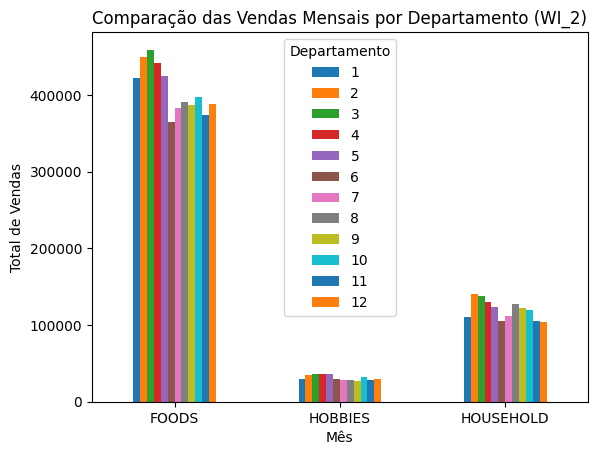

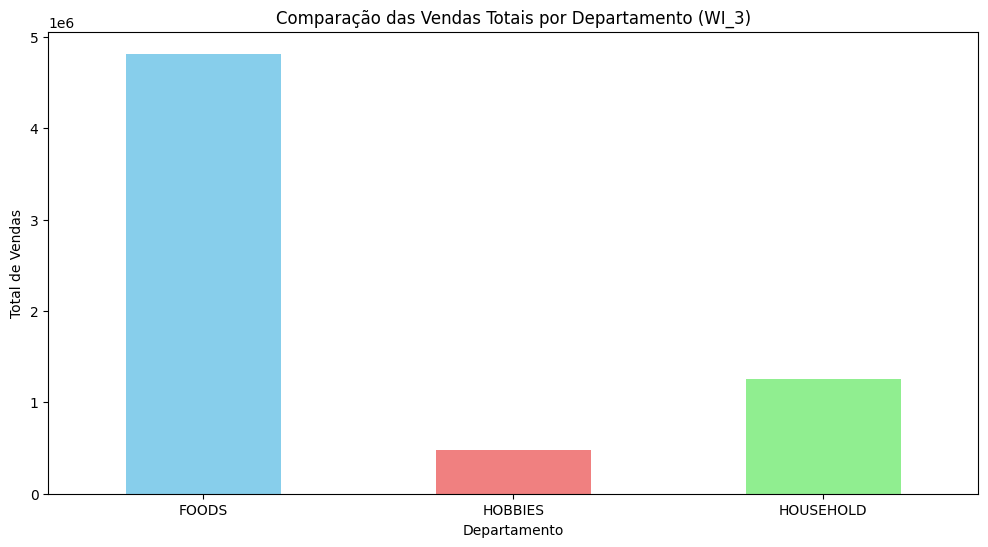

<Figure size 1500x700 with 0 Axes>

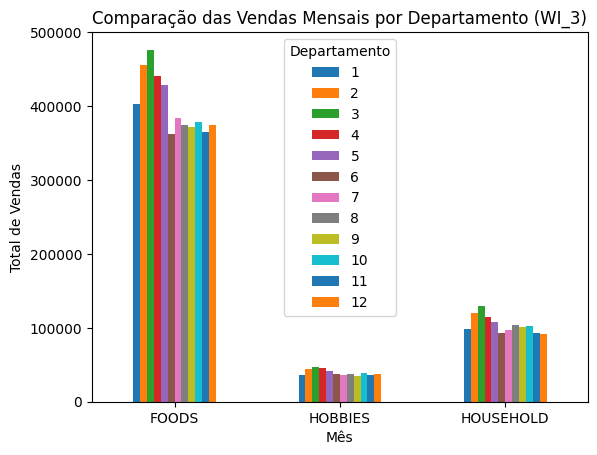

In [ ]:
# Supondo que o DataFrame já esteja carregado e se chama df
lojas = ['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3']

# Função para plotar as comparações
def plot_comparacao_vendas(data, loja):
    # Filtrar os dados por store_id
    data_loja = data[data['store_id'] == loja]

    # Agrupar por 'cat_id' e somar os valores de vendas
    vendas_por_departamento = data_loja.groupby('cat_id', observed=False)['value'].sum()

    # Plotar a comparação das vendas totais por departamento
    plt.figure(figsize=(12, 6))
    vendas_por_departamento.plot(kind='bar', color=['skyblue', 'lightcoral', 'lightgreen'])
    plt.title(f'Comparação das Vendas Totais por Departamento ({loja})')
    plt.xlabel('Departamento')
    plt.ylabel('Total de Vendas')
    plt.xticks(rotation=0)
    plt.show()

    # Agrupar por 'cat_id' e 'month' e somar os valores de vendas
    vendas_mensais_por_departamento = data_loja.groupby(['cat_id', 'month'], observed=False)['value'].sum().unstack()

    # Plotar a comparação das vendas mensais por departamento
    plt.figure(figsize=(15, 7))
    vendas_mensais_por_departamento.plot(kind='bar')
    plt.title(f'Comparação das Vendas Mensais por Departamento ({loja})')
    plt.xlabel('Mês')
    plt.ylabel('Total de Vendas')
    plt.xticks(rotation=0)
    plt.legend(title='Departamento')
    plt.show()

# Loop para iterar sobre cada loja e plotar as comparações
for loja in lojas:
    plot_comparacao_vendas(data, loja)


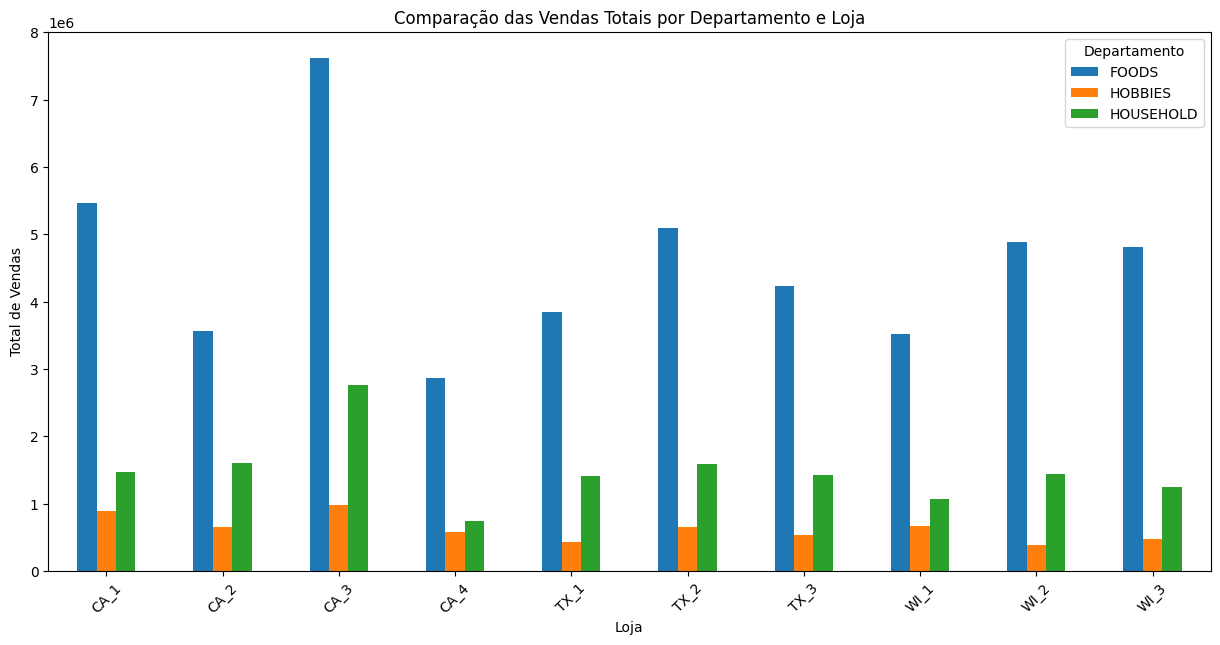

In [ ]:
# Supondo que o DataFrame já esteja carregado e se chama df
lojas = ['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3']

# Agrupar por 'store_id' e 'cat_id' e somar os valores de vendas
vendas_por_loja_departamento = data.groupby(['store_id', 'cat_id'], observed=False)['value'].sum().unstack()

# Plotar a comparação das vendas totais por departamento e loja
vendas_por_loja_departamento.plot(kind='bar', figsize=(15, 7))
plt.title('Comparação das Vendas Totais por Departamento e Loja')
plt.xlabel('Loja')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=45)
plt.legend(title='Departamento')
plt.show()

Departamento FOODS:

- Este departamento domina as vendas em todas as lojas, com valores variando significativamente.

- A loja CA_3 tem o maior total de vendas, seguido por CA_1, TX_2, WI_2 e WI_3.

- Todas as lojas apresentam um padrão similar, com FOODS tendo o maior volume de vendas.


Departamento HOUSEHOLD:

- Este departamento é representado pelas barras verdes e tem o segundo maior volume de vendas em todas as lojas.

- As vendas são substancialmente menores que FOODS, mas ainda assim significativas.

- Novamente, CA_3 se destaca como a loja com maior volume de vendas para HOUSEHOLD, seguida por CA_1, CA_2, TX_2, e WI_2.


Departamento HOBBIES:

- Este departamento tem o menor volume de vendas em todas as lojas.

As vendas são bastante uniformes entre as lojas, com CA_3 liderando seguido por  CA_1, mas com um volume total ainda consideravelmente menor em comparação aos outros departamentos.

Análise:

- FOODS é claramente o departamento mais importante em termos de vendas em todas as lojas, com CA_3 sendo a loja de melhor desempenho.

- HOUSEHOLD também é um departamento importante, mas suas vendas são aproximadamente metade ou menos do volume de FOODS.

- HOBBIES apresenta o menor volume de vendas, sugerindo uma menor prioridade ou demanda por estes produtos.

In [ ]:
# Agrupar por 'item_id' e 'month' e somar os valores de vendas
vendas_por_item_mes = data.groupby(['item_id', 'month'], observed=False)['value'].sum().unstack()

# Identificar os itens mais vendidos
top_itens_por_mes = vendas_por_item_mes.idxmax()

# Mostrar os itens mais vendidos e os meses correspondentes
print("Itens mais vendidos por mês:")
print(top_itens_por_mes)

Itens mais vendidos por mês:
month
1     FOODS_3_090
2     FOODS_3_586
3     FOODS_3_090
4     FOODS_3_090
5     FOODS_3_586
6     FOODS_3_586
7     FOODS_3_586
8     FOODS_3_586
9     FOODS_3_090
10    FOODS_3_090
11    FOODS_3_090
12    FOODS_3_586
dtype: category
Categories (3049, object): ['FOODS_1_001', 'FOODS_1_002', 'FOODS_1_003', 'FOODS_1_004', ..., 'HOUSEHOLD_2_513', 'HOUSEHOLD_2_514', 'HOUSEHOLD_2_515', 'HOUSEHOLD_2_516']


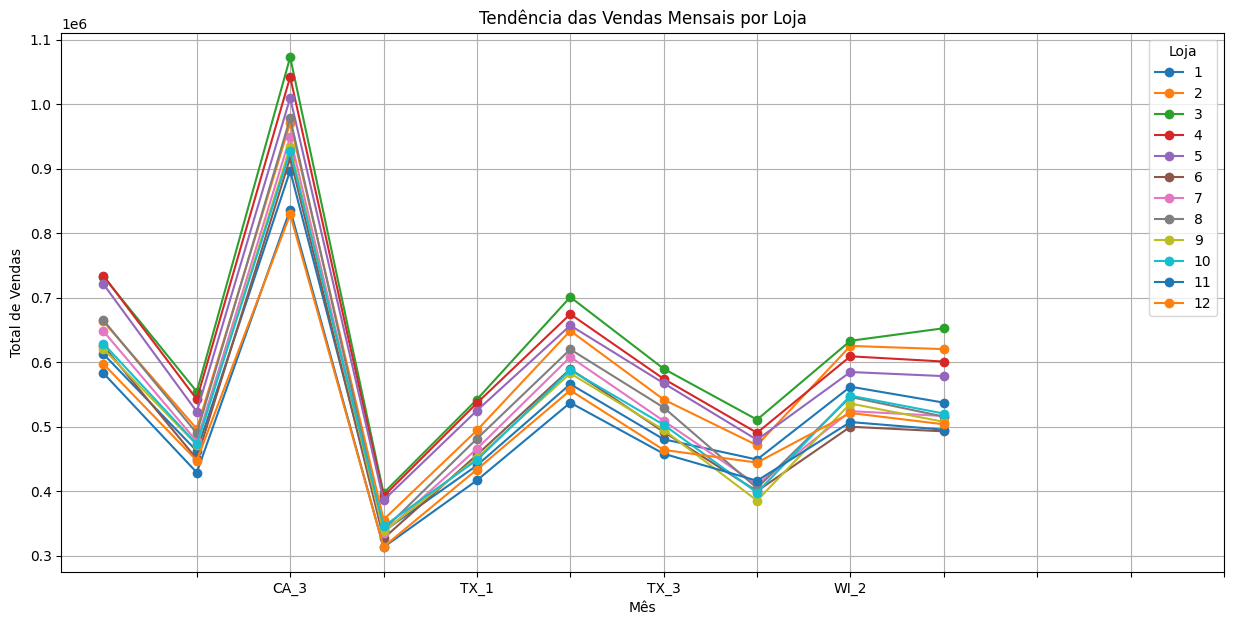

In [ ]:
# Agrupar por 'store_id' e 'month' e somar os valores de vendas
vendas_mensais_por_loja = data.groupby(['store_id', 'month'], observed=False)['value'].sum().unstack()

# Plotar a distribuição das vendas mensais por loja
vendas_mensais_por_loja.plot(kind='line', figsize=(15, 7), marker='o')
plt.title('Tendência das Vendas Mensais por Loja')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(range(1, 13))
plt.legend(title='Loja')
plt.grid(True)
plt.show()

As vendas mensais variam significativamente ao longo do ano para cada loja.
Todas as lojas apresentam um pico e um vale nas vendas ao longo dos meses, indicando possíveis efeitos sazonais ou promoções específicas

Loja CA_3:

- CA_3 tem um pico acentuado nas vendas, especialmente em um mês específico, onde este é o ponto mais alto no gráfico, indicando um desempenho excepcional em comparação com outras lojas.

- Após o pico, as vendas caem significativamente, mas ainda permanecem relativamente altas em comparação com outras lojas.

Loja TX_1 e TX_3:

- Ambas as lojas apresentam padrões semelhantes de vendas, com variações mensais que seguem uma tendência parecida.

Loja WI_2:

- WI_2 também segue um padrão de vendas semelhante ao de TX_1 e TX_3.

- A variação ao longo dos meses é menos pronunciada em comparação com CA_3.


In [ ]:
# Identificar as lojas que vendem menos em cada mês
min_vendas_por_mes = vendas_mensais_por_loja.idxmin()

# Mostrar as lojas com menos vendas e os meses correspondentes
print("Lojas com menos vendas por mês:")
print(min_vendas_por_mes)

Lojas com menos vendas por mês:
month
1     CA_4
2     CA_4
3     CA_4
4     CA_4
5     CA_4
6     CA_4
7     CA_4
8     CA_4
9     CA_4
10    CA_4
11    CA_4
12    CA_4
dtype: category
Categories (10, object): ['CA_1', 'CA_2', 'CA_3', 'CA_4', ..., 'TX_3', 'WI_1', 'WI_2', 'WI_3']


/var/tmp/ipykernel_4743/3719890519.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = vendas_por_loja_departamento_mes.pivot_table(values='value', index='month', columns=['store_id', 'cat_id'], fill_value=0)


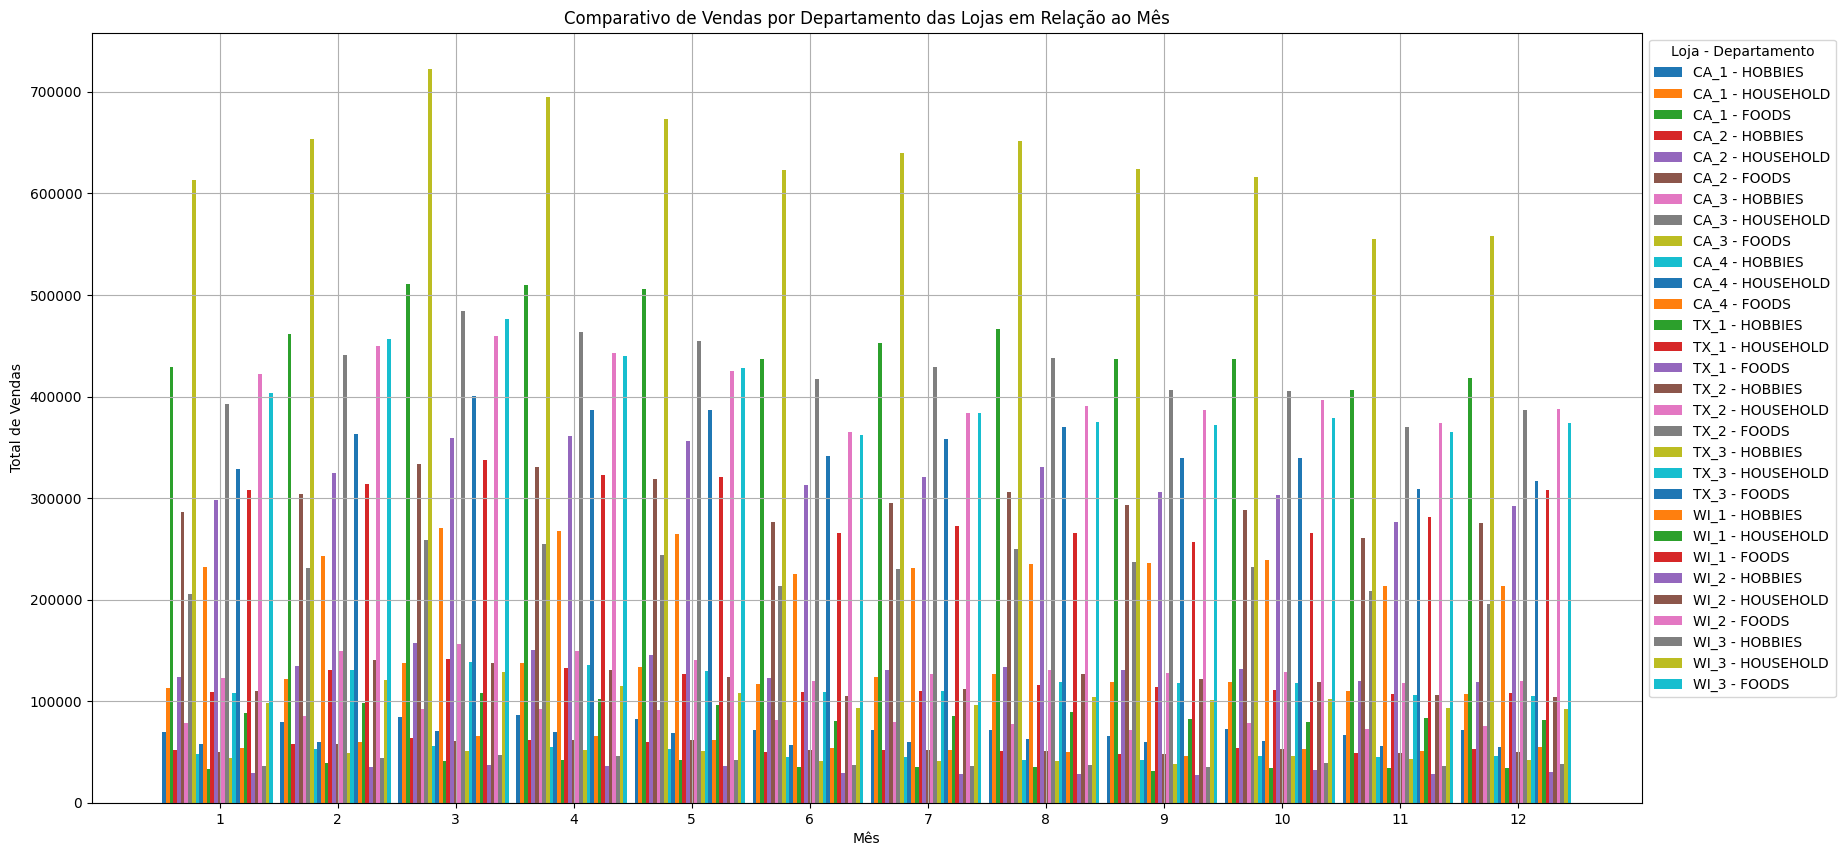

In [ ]:

# Supondo que o DataFrame já esteja carregado e se chama df
lojas = ['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3']
departamentos = ['HOBBIES', 'HOUSEHOLD', 'FOODS']

# Agrupar por 'store_id', 'cat_id', e 'month' e somar os valores de vendas
vendas_por_loja_departamento_mes = data.groupby(['store_id', 'cat_id', 'month'], observed=False)['value'].sum().reset_index()

# Criar uma pivot table para reorganizar os dados
pivot_table = vendas_por_loja_departamento_mes.pivot_table(values='value', index='month', columns=['store_id', 'cat_id'], fill_value=0)

# Reorganizar os dados para o gráfico de barras agrupadas
pivot_table = pivot_table.stack(level=[0, 1], future_stack=True).unstack(level=[1, 2])
pivot_table.columns = ['_'.join(col).strip() for col in pivot_table.columns.values]

# Plotar o comparativo de vendas por departamento das lojas em relação ao mês usando gráfico de barras agrupadas
fig, ax = plt.subplots(figsize=(20, 10))

months = pivot_table.index
bar_width = 0.1
group_width = bar_width * len(departamentos) * len(lojas)
index = np.arange(len(months)) * (group_width + 0.2)  # Adding space between groups

for i, loja in enumerate(lojas):
    for j, departamento in enumerate(departamentos):
        column = f'{loja}_{departamento}'
        if column in pivot_table.columns:
            plt.bar(index + bar_width * (i * len(departamentos) + j), pivot_table[column], bar_width, label=f'{loja} - {departamento}')

plt.title('Comparativo de Vendas por Departamento das Lojas em Relação ao Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.xticks(index + group_width / 2, months)
plt.legend(title='Loja - Departamento', loc='upper left', bbox_to_anchor=(1, 1))
plt.grid(True)
plt.show()

Variação Mensal:

- As vendas mensais variam significativamente entre diferentes departamentos e lojas.
- Os picos de vendas mais altos são observados principalmente nos departamentos de FOODS e HOUSEHOLD, com FOODS geralmente tendo os maiores totais de vendas.

Comparação por Loja:

- CA_1 a CA_4: As lojas da Califórnia (CA_1 a CA_4) mostram uma tendência consistente de altos volumes de vendas nos departamentos de FOODS, com picos em certos meses, especialmente visíveis em CA_3.

- TX_1 a TX_3: As lojas do Texas (TX_1 a TX_3) têm uma distribuição similar, com FOODS e HOUSEHOLD liderando as vendas. No entanto, os picos não são tão pronunciados quanto nas lojas da Califórnia.

- WI_1 a WI_3: As lojas de Wisconsin (WI_1 a WI_3) mostram uma menor variação entre os departamentos, mas FOODS ainda domina as vendas.

Padrões Sazonais:

- Os picos de vendas ocorrem em diferentes meses, sugerindo influências sazonais ou promoções específicas.

- A variação mensal é mais visível nos departamentos de FOODS e HOUSEHOLD, enquanto HOBBIES apresenta vendas mais estáveis e geralmente mais baixas.

Desempenho dos Departamentos:

- FOODS: Consistentemente o departamento com o maior volume de vendas em todas as lojas, com picos evidentes em meses específicos.

- HOUSEHOLD: O segundo maior em termos de vendas, com algumas lojas mostrando picos significativos.

- HOBBIES: Tem o menor volume de vendas entre os três departamentos, com variações menos pronunciadas ao longo dos meses.

Interpretação:

- FOODS é o departamento mais forte em termos de vendas em todas as lojas, com variações sazonais indicando períodos de alta demanda.

- HOUSEHOLD também mostra um bom desempenho, embora menor que FOODS, e tem picos em meses específicos.

- HOBBIES apresenta vendas estáveis, mas consideravelmente menores, sugerindo uma demanda menor por produtos deste departamento.

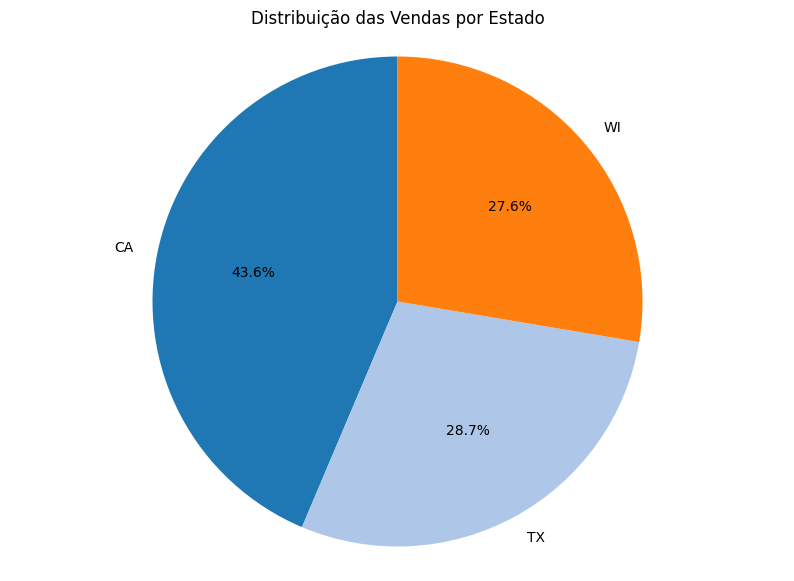

In [ ]:
# Agrupar por 'state_id' e somar os valores de vendas
vendas_por_estado = data.groupby('state_id', observed=False)['value'].sum().reset_index()

# Plotar o gráfico de pizza para mostrar a distribuição das vendas por estado
fig, ax = plt.subplots(figsize=(10, 7))

ax.pie(vendas_por_estado['value'], labels=vendas_por_estado['state_id'], autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Distribuição das Vendas por Estado')
plt.show()

CA (Califórnia):

Representa a maior parte das vendas, com 43,6% do total.

TX (Texas):

Corresponde a 28,7% das vendas totais.

WI (Wisconsin):

É responsável por 27,6% das vendas totais.


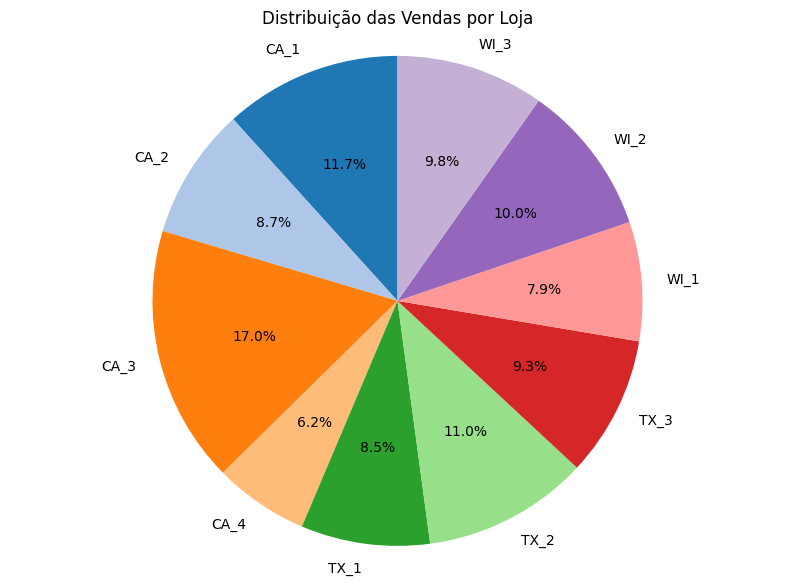

In [ ]:
vendas_por_loja = data.groupby('store_id', observed=False)['value'].sum().reset_index()

# Plotar o gráfico de pizza para mostrar a distribuição das vendas por loja
fig, ax = plt.subplots(figsize=(10, 7))

ax.pie(vendas_por_loja['value'], labels=vendas_por_loja['store_id'], autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
ax.axis('equal')

plt.title('Distribuição das Vendas por Loja')
plt.show()

Distribuição Percentual:

- CA_3 é a loja com a maior participação nas vendas, representando 17,0% do total.

- CA_1 e TX_2 também têm participações significativas, com 11,7% e 11,0% respectivamente.

- As lojas WI_3, WI_2, TX_3, WI_1, TX_1, CA_2 e CA_4 têm participações menores, variando entre 6,2% e 10,0%.

Comparação entre Lojas:

- A loja CA_3 destaca-se significativamente em relação às outras, indicando um desempenho superior em termos de vendas.

- As lojas CA_1 e TX_2 também têm uma boa participação, mas não tão alta quanto CA_3.

- As lojas CA_2, CA_4, e TX_1 têm as menores participações, sugerindo um desempenho mais fraco em comparação com outras lojas.

Interpretação:

- CA_3 é claramente a loja líder em termos de vendas, sugerindo que esta loja pode estar localizada em uma área com alta demanda, ou pode ter estratégias de vendas e marketing particularmente eficazes.

- CA_1 e TX_2 também mostram um bom desempenho, indicando uma forte presença de mercado nessas áreas.

- As lojas com menor participação nas vendas podem precisar de estratégias adicionais para melhorar seu desempenho, como promoções, melhoria na variedade de produtos ou outros incentivos para atrair mais clientes.

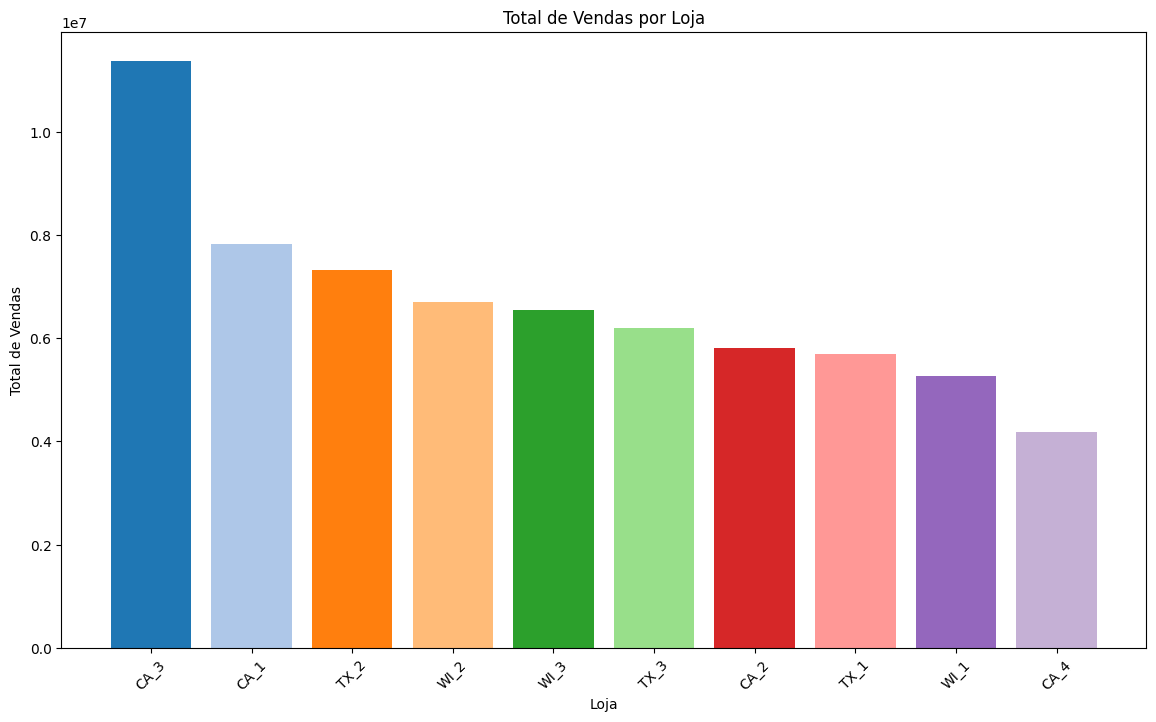

In [ ]:
vendas_por_loja = data.groupby('store_id', observed=True)['value'].sum().reset_index()

# Ordenar os dados por valor de vendas para uma melhor visualização
vendas_por_loja = vendas_por_loja.sort_values(by='value', ascending=False)

# Plotar o gráfico de barras para mostrar o total de vendas por loja
fig, ax = plt.subplots(figsize=(14, 8))

ax.bar(vendas_por_loja['store_id'], vendas_por_loja['value'], color=plt.cm.tab20.colors)
ax.set_xlabel('Loja')
ax.set_ylabel('Total de Vendas')
ax.set_title('Total de Vendas por Loja')
plt.xticks(rotation=45)
plt.show()

Desempenho das Lojas:

- CA_3 é a loja com o maior total de vendas, superando 1 milhão de unidades vendidas. É claramente a líder entre todas as lojas.

- CA_1 também tem um bom desempenho, mas significativamente menor que CA_3.

- As lojas TX_2, WI_2, e WI_3 seguem em um grupo intermediário com totais de vendas semelhantes.

Comparação Entre Lojas:

- As lojas TX_3, CA_2, TX_1, WI_1, e CA_4 apresentam totais de vendas menores, com CA_4 tendo o menor total de vendas entre todas as lojas.

- Existe uma clara diferença entre o grupo de lojas com vendas mais altas (CA_3 e CA_1) e aquelas com vendas mais baixas (TX_3, CA_2, TX_1, WI_1, CA_4).

Interpretação:

- CA_3 está se destacando de maneira significativa, indicando que esta loja possui estratégias de vendas e/ou localização que impulsionam as vendas. Esta loja deve ser analisada para identificar os fatores de sucesso que podem ser replicados em outras lojas.

- CA_1 também está performando bem, embora com um total de vendas consideravelmente menor que CA_3.

- As lojas no meio do gráfico, como TX_2, WI_2, e WI_3, têm vendas razoáveis, mas há espaço para crescimento.

- As lojas com vendas menores (especialmente CA_4) podem precisar de atenção especial, possivelmente através de melhorias em estratégias de marketing, merchandising ou atendimento ao cliente.

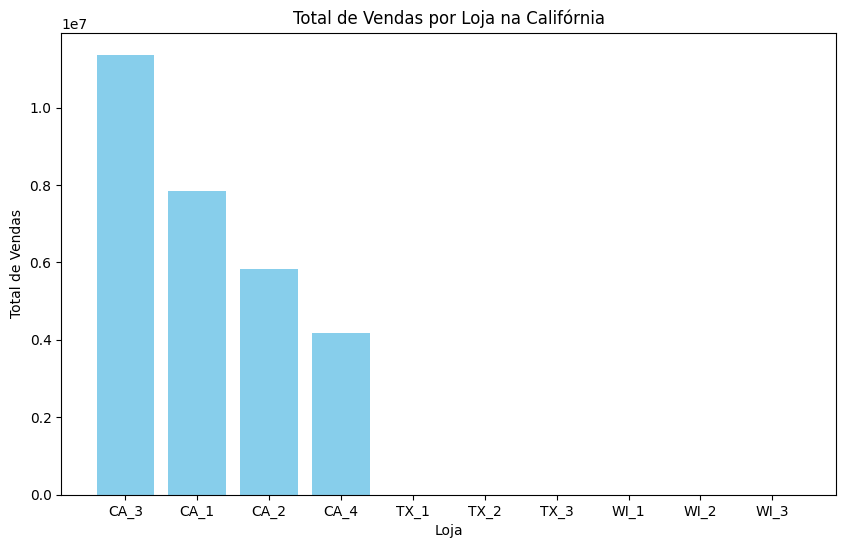

In [ ]:
# Passo 2: Filtrar os dados para o estado da Califórnia
ca_stores = data[data['store_id'].str.contains('CA')]

# Passo 3: Agrupar os dados por loja e calcular o total de vendas
store_sales = ca_stores.groupby('store_id', observed=False)['value'].sum().reset_index()

# Passo 4: Ordenar os dados para identificar a loja com maiores e menores vendas
store_sales = store_sales.sort_values(by='value', ascending=False)

# Passo 5: Plotar os gráficos
plt.figure(figsize=(10, 6))
plt.bar(store_sales['store_id'], store_sales['value'], color='skyblue')
plt.xlabel('Loja')
plt.ylabel('Total de Vendas')
plt.title('Total de Vendas por Loja na Califórnia')
plt.show()

Lojas na Califórnia:

- CA_3: Aproximadamente 11 mil em vendas, a loja com o maior total de vendas.
- CA_1: aproximadamente 8 mil em vendas.
- CA_2: Aproximadamente 6 mil em vendas.
- CA_4: aproximadamente 4 mil em vendas.


Conclusões:

- A loja CA_3 é a que tem o maior total de vendas na Califórnia.

- As lojas CA_1, CA_2 e CA_4 também têm vendas significativas, mas são menores em comparação à CA_3.

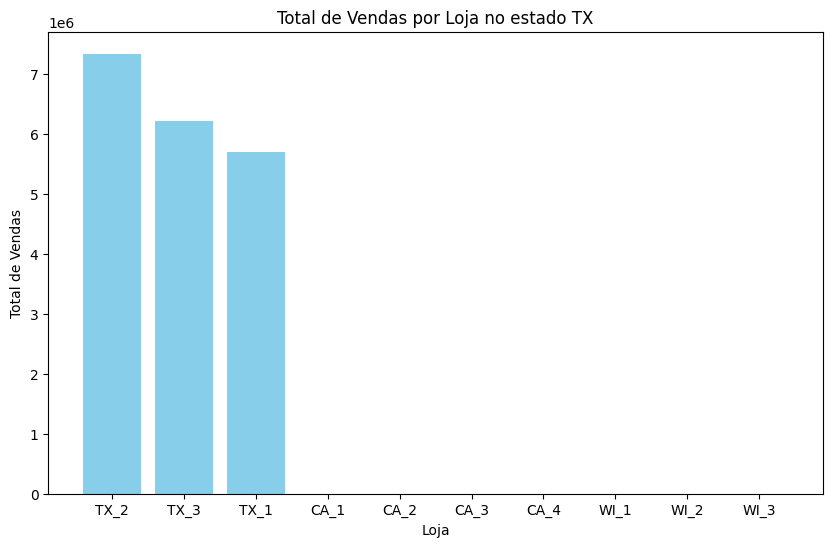

Loja com maior venda em TX: TX_2
Loja com menor venda em TX: WI_3


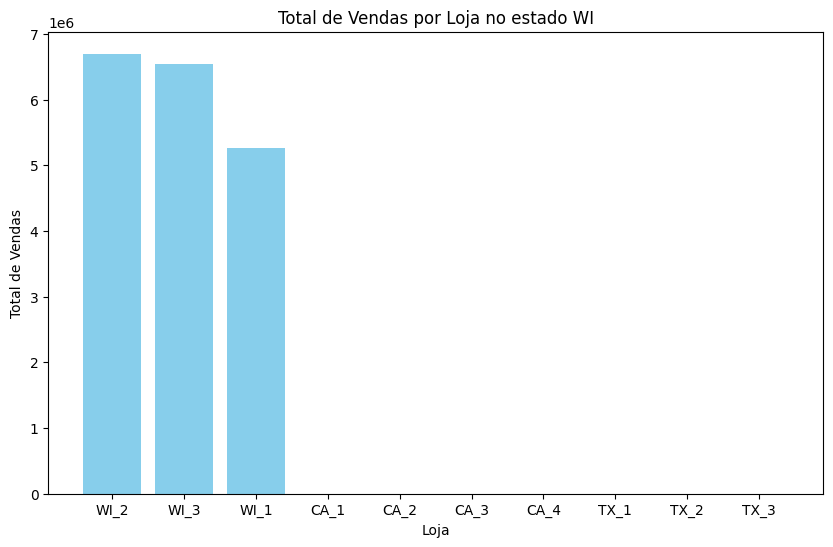

Loja com maior venda em WI: WI_2
Loja com menor venda em WI: TX_3


In [ ]:
def plot_sales_by_store(state_prefix):
    state_stores = data[data['store_id'].str.contains(state_prefix)]
    store_sales = state_stores.groupby('store_id', observed=False)['value'].sum().reset_index()
    store_sales = store_sales.sort_values(by='value', ascending=False)

    plt.figure(figsize=(10, 6))
    plt.bar(store_sales['store_id'], store_sales['value'], color='skyblue')
    plt.xlabel('Loja')
    plt.ylabel('Total de Vendas')
    plt.title(f'Total de Vendas por Loja no estado {state_prefix}')
    plt.show()

    print(f"Loja com maior venda em {state_prefix}:", store_sales.iloc[0]['store_id'])
    print(f"Loja com menor venda em {state_prefix}:", store_sales.iloc[-1]['store_id'])

# Passo 2: Plotar para as lojas no Texas (TX)
plot_sales_by_store('TX')

# Passo 3: Plotar para as lojas em Wisconsin (WI)
plot_sales_by_store('WI')

Análise das lojas no estado TX:

- TX_2: Tem o maior total de vendas, ultrapassando 7 mil.
- TX_3: O segundo maior, com total de vendas acima de 6 mil, mas menos que - TX_2.
- TX_1: Também significativo, com total de vendas ligeiramente abaixo de TX_3.

Insights da loja TX:

- Maiores Vendas: A loja TX_2 é a principal em termos de vendas no estado do Texas.
- Vendas Comparativas: TX_3 e TX_1 seguem, com TX_3 tendo um desempenho ligeiramente melhor que TX_1.

Análise das lojas no estado WI:

- WI_2: Tem o maior total de vendas, ultrapassando 6 mil.
- WI_3: O segundo maior, com total de vendas ligeiramente inferior a WI_2, mas ainda acima de 6 mil.
- WI_1: Também significativo, com total de vendas acima de 5 mil.

Insights da loja WI:

- Maiores Vendas: A loja WI_2 é a principal em termos de vendas no estado de Wisconsin.
- Vendas Comparativas: WI_3 e WI_1 seguem, com WI_3 tendo um desempenho um melhor que WI_1.

### Total de vendas da empresa

In [ ]:
data.set_index('date', inplace=True)

In [ ]:
data

,id,item_id,dept_id,cat_id,store_id,state_id,value,year,month,day,day_of_week
date,,,,,,,,,,,
2011-01-29,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,2011,1,29,5
2011-01-29,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,2011,1,29,5
2011-01-29,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,2011,1,29,5
2011-01-29,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,2011,1,29,5
2011-01-29,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,2011,1,29,5
...,...,...,...,...,...,...,...,...,...,...,...
2016-05-22,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,1,2016,5,22,6
2016-05-22,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,2016,5,22,6
2016-05-22,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,2,2016,5,22,6


In [ ]:
data_total_vendas = data[['value']]

In [ ]:
data_total_vendas

,value
date,
2011-01-29,0
2011-01-29,0
2011-01-29,0
2011-01-29,0
2011-01-29,0
...,...
2016-05-22,1
2016-05-22,0
2016-05-22,2


In [ ]:
data_total_vendas_mensal = data_total_vendas.resample('ME').sum()

In [ ]:
data_total_vendas_mensal

,value
date,
2011-01-31,88163
2011-02-28,726375
2011-03-31,763567
2011-04-30,737713
2011-05-31,719562
...,...
2016-01-31,1215286
2016-02-29,1212927
2016-03-31,1275746


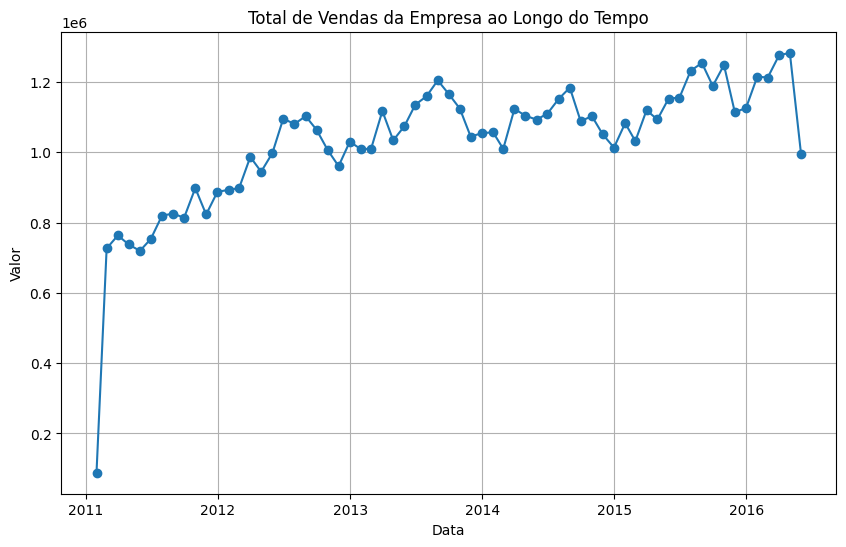

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data_total_vendas_mensal.index, data_total_vendas_mensal['value'], marker='o')
plt.title('Total de Vendas da Empresa ao Longo do Tempo')
plt.xlabel('Data')
plt.ylabel('Valor')
plt.grid(True)
plt.show()

### Total de vendas por cada estado

In [ ]:
data_estados = data[['state_id', 'value']]

In [ ]:
data_estados

,state_id,value
date,,
2011-01-29,CA,0
2011-01-29,CA,0
2011-01-29,CA,0
2011-01-29,CA,0
2011-01-29,CA,0
...,...,...
2016-05-22,WI,1
2016-05-22,WI,0
2016-05-22,WI,2


In [ ]:
data_estados_total = data_estados.groupby('state_id', observed=False).sum()

In [ ]:
data_estados_total

,value
state_id,
CA,29196717
TX,19228405
WI,18502051


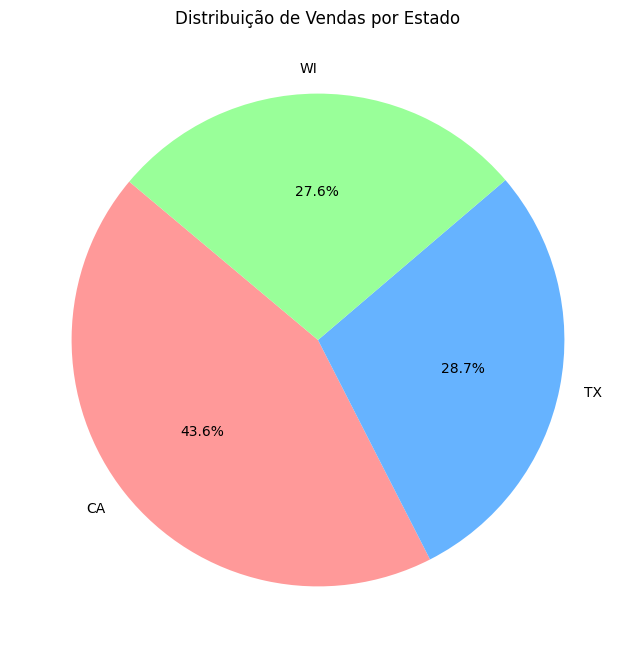

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(data_estados_total['value'], labels=data_estados_total.index, autopct='%1.1f%%', startangle=140, colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribuição de Vendas por Estado')
plt.show()

CA (Califórnia):

Representa a maior parte das vendas, com 43,6% do total.

TX (Texas):

Corresponde a 28,7% das vendas totais.

WI (Wisconsin):

É responsável por 27,6% das vendas totais.

In [ ]:
data_estado_total = data_estados.groupby('state_id', observed=False).resample('ME').sum().reset_index()

In [ ]:
data_estado_total

,state_id,date,value
0,CA,2011-01-31,38108
1,CA,2011-02-28,318101
2,CA,2011-03-31,339678
3,CA,2011-04-30,331004
4,CA,2011-05-31,321566
...,...,...,...
190,WI,2016-01-31,368104
191,WI,2016-02-29,379113
192,WI,2016-03-31,393142
193,WI,2016-04-30,401284


In [ ]:
data_estado_total.set_index('date', inplace=True)

In [ ]:
states = data_estado_total['state_id'].unique()

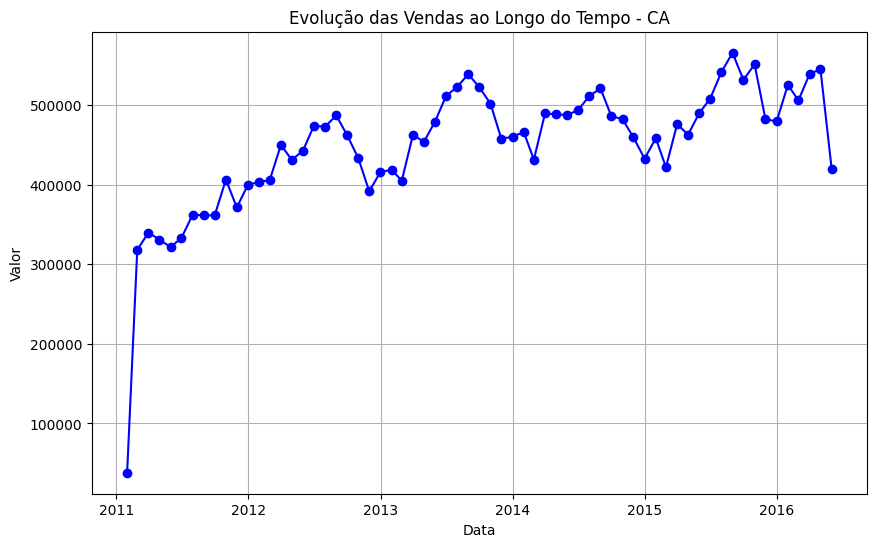

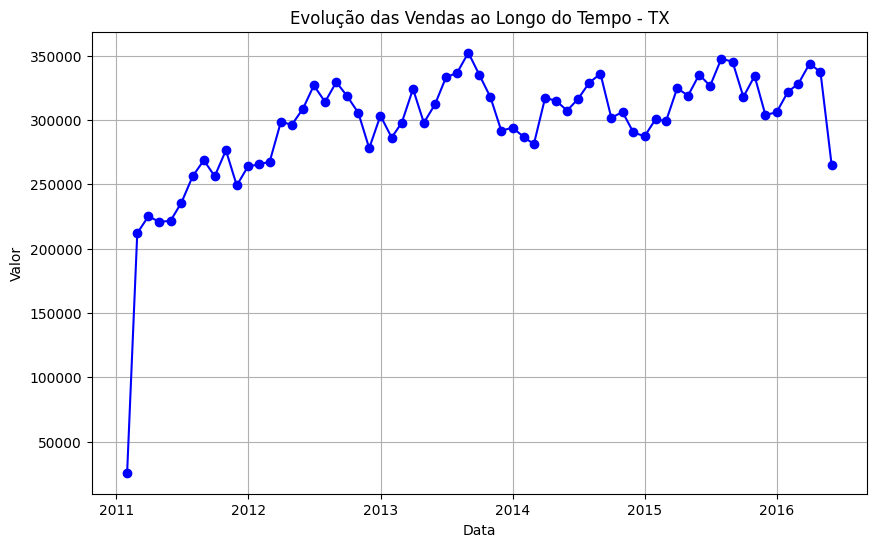

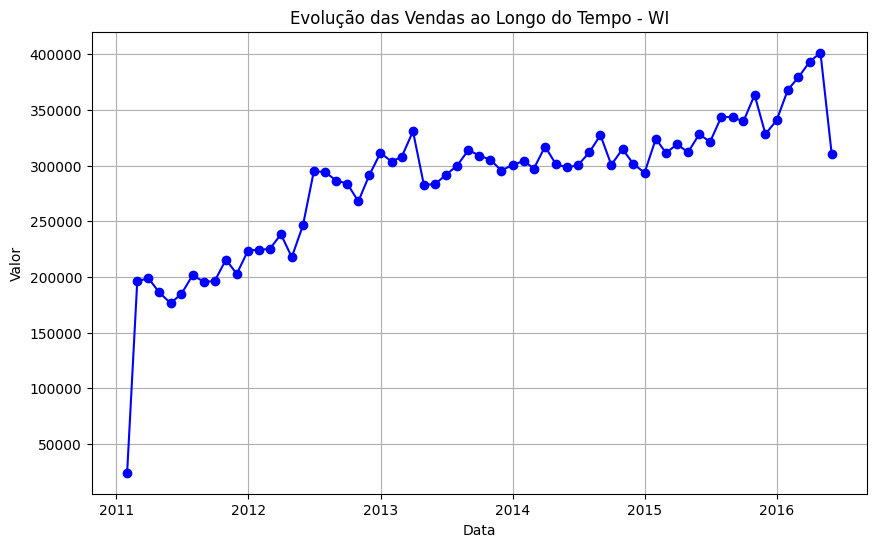

In [ ]:
# Gerar gráficos para cada estado
for state in states:

    state_df = data_estado_total[data_estado_total['state_id'] == state]
    plt.figure(figsize=(10, 6))
    plt.plot(state_df.index, state_df['value'], marker='o', linestyle='-', color='b')
    plt.title(f'Evolução das Vendas ao Longo do Tempo - {state}')
    plt.xlabel('Data')
    plt.ylabel('Valor')
    plt.grid(True)

    plt.show()

Observações para CA:

- 2011: As vendas começam abaixo de 100.000, mas rapidamente aumentam para cerca de 300.000.
- 2012-2013: As vendas continuam a subir, alcançando valores entre 400.000 e 500.000 com alguma variabilidade.
- 2013: Há um pico notável onde as vendas atingem mais de 500.000. No entanto, há flutuações, com algumas quedas consideráveis.
- 2015: As vendas mantêm-se elevadas, variando entre 450.000 e 550.000.
- 2016: O início do ano mostra vendas relativamente altas, mas há uma queda significativa no final do período.

Tendência Geral para CA:

- A tendência geral das vendas é de crescimento ao longo do período, embora com flutuações periódicas. A linha mostra um aumento constante de 2011 até 2016, apesar das variações anuais.

Observações para TX:

- 2011: As vendas começam abaixo de 50.000, mas rapidamente aumentam para cerca de 200.000.
- 2012-2013: As vendas continuam a subir, alcançando valores entre 250.000 e 300.000 com alguma variabilidade.
- 2014: Há um pico notável onde as vendas atingem mais de 300.000. No entanto, há flutuações, com algumas quedas consideráveis.
- 2015: As vendas mantêm-se elevadas, variando entre 280.000 e 350.000.
- 2016: O início do ano mostra vendas relativamente altas, mas há uma queda significativa no final do período.

Tendência Geral:

- A tendência geral das vendas é de crescimento ao longo do período, embora com flutuações periódicas. A linha mostra um aumento constante de 2011 até 2016, apesar das variações anuais.

Observações para WI:

Tendências ao Longo do Tempo:

- 2011: As vendas começam abaixo de 50.000, mas rapidamente aumentam para cerca de 200.000.
- 2012-2013: As vendas continuam a subir, alcançando valores entre 250.000 e 300.000 com alguma variabilidade.
- 2014-2015: As vendas mantêm-se relativamente estáveis, variando entre 300.000 e 330.000, mas com uma leve tendência de crescimento.
- 2016: As vendas mostram um crescimento contínuo no início do ano, atingindo um pico de 400.000, seguido por uma queda significativa no final do período.

In [ ]:
data_estado_total['month'] = data_estado_total.index.month

In [ ]:
data_estado_total

,state_id,value,month
date,,,
2011-01-31,CA,38108,1
2011-02-28,CA,318101,2
2011-03-31,CA,339678,3
2011-04-30,CA,331004,4
2011-05-31,CA,321566,5
...,...,...,...
2016-01-31,WI,368104,1
2016-02-29,WI,379113,2
2016-03-31,WI,393142,3


In [ ]:
data_vendas_totais_mensais_por_estado = data_estado_total.groupby(['month', 'state_id'], observed=False)['value'].sum().unstack()

In [ ]:
data_vendas_totais_mensais_por_estado

state_id,CA,TX,WI
month,,,
1,2310016,1486819,1548676
2,2487243,1685385,1716961
3,2757151,1833129,1796930
4,2711377,1785533,1700883
5,2640343,1749651,1643085
6,2319163,1538004,1393045
7,2409945,1583048,1450982
8,2473609,1631287,1466834
9,2363481,1529218,1429190


state_id       CA       TX       WI
month                              
1         2310016  1486819  1548676
2         2487243  1685385  1716961
3         2757151  1833129  1796930
4         2711377  1785533  1700883
5         2640343  1749651  1643085
6         2319163  1538004  1393045
7         2409945  1583048  1450982
8         2473609  1631287  1466834
9         2363481  1529218  1429190
10        2374380  1539493  1466716
11        2162088  1412432  1419104
12        2187921  1454406  1469645


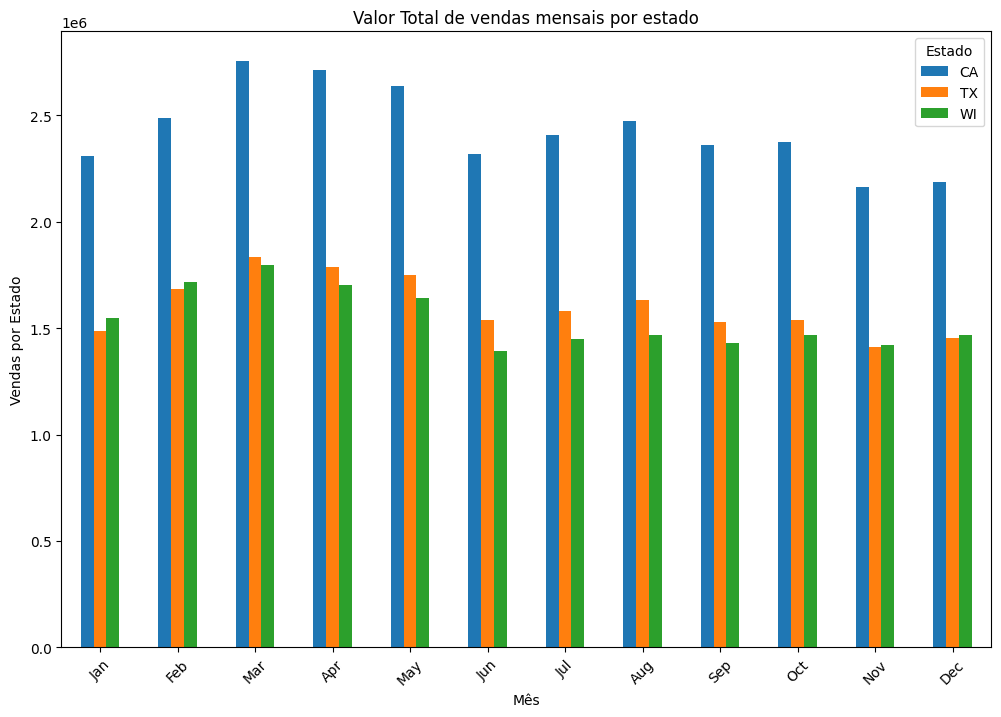

In [ ]:
data_vendas_totais_mensais_por_estado.plot(kind='bar', figsize=(12, 8))
plt.title('Valor Total de vendas mensais por estado')
plt.xlabel('Mês')
plt.ylabel('Vendas por Estado')
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.legend(title='Estado')

print(data_vendas_totais_mensais_por_estado)

Tendências Gerais:

- A Califórnia (CA) mostra consistentemente os maiores valores de vendas a cada mês em comparação com o Texas (TX) e Wisconsin (WI).
- Texas (TX) e Wisconsin (WI) têm valores de vendas semelhantes, com o Texas ligeiramente mais alto em alguns meses.

Análise Mensal:

- As maiores vendas para a Califórnia (CA) ocorrem em março e abril, atingindo perto de 2,8 milhões.
- As vendas caem ligeiramente para a Califórnia nos meses de verão (junho, julho e agosto), mas permanecem mais altas que nos outros dois estados.
- Para Texas (TX) e Wisconsin (WI), os valores de vendas permanecem relativamente consistentes ao longo do ano, com pequenas flutuações.


Insights Comparativos:

- A dominância da Califórnia nas vendas sugere uma presença de mercado mais forte ou uma base de clientes maior nesse estado.
- A diferença de vendas entre a Califórnia e os outros dois estados destaca uma disparidade significativa no mercado.
- Os dados indicam um potencial para estratégias de marketing ou vendas direcionadas no Texas e em Wisconsin para reduzir a diferença com a Califórnia.


### Total de vendas em cada loja

In [ ]:
data_vendas_p_loja = data[['store_id', 'value']]

In [ ]:
data_vendas_mensais_p_loja = data_vendas_p_loja.groupby('store_id', observed=False).resample('ME').sum().reset_index()

In [ ]:
data_vendas_mensais_p_loja

,store_id,date,value
0,CA_1,2011-01-31,11308
1,CA_1,2011-02-28,89434
2,CA_1,2011-03-31,93468
3,CA_1,2011-04-30,91553
4,CA_1,2011-05-31,87988
...,...,...,...
645,WI_3,2016-01-31,113222
646,WI_3,2016-02-29,115407
647,WI_3,2016-03-31,119558
648,WI_3,2016-04-30,120175


In [ ]:
data_vendas_mensais_p_loja.set_index('date', inplace=True)

In [ ]:
data_vendas_mensais_p_loja['month'] = data_vendas_mensais_p_loja.index.month

In [ ]:
data_vendas_mensais_totais_p_loja = data_vendas_mensais_p_loja.groupby(['month', 'store_id'], observed=False)['value'].sum().unstack()

In [ ]:
data_vendas_mensais_totais_p_loja

store_id,CA_1,CA_2,CA_3,CA_4,TX_1,TX_2,TX_3,WI_1,WI_2,WI_3
month,,,,,,,,,,
1,612684,462367,897004,337961,440074,566110,480635,449168,562106,537402
2,663155,496826,971206,356056,494442,648746,542197,471352,625269,620340
3,732819,554375,1072785,397172,542227,700997,589905,510957,633278,652695
4,734350,542546,1042266,392215,536675,674605,574253,490615,609181,601087
5,721068,523341,1009813,386121,525086,657066,567499,479743,584855,578487
6,625257,450116,916812,326978,456428,589498,492078,400164,500020,492861
7,648071,477257,949142,335475,465898,608094,509056,410127,524180,516675
8,665090,490003,978528,339988,481436,620015,529836,404954,546193,515687
9,620576,471995,933203,337707,451421,582739,495058,385590,536039,507561


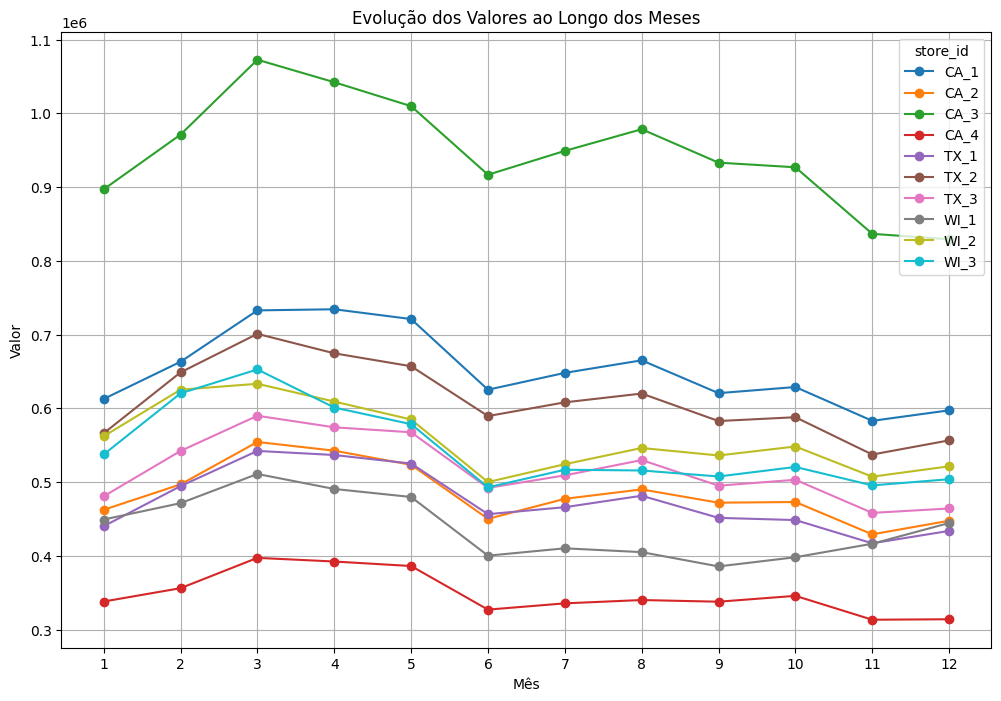

In [ ]:
plt.figure(figsize=(12, 8))

# Plotar para cada store_id
for column in data_vendas_mensais_totais_p_loja.columns[0:]:
    plt.plot(data_vendas_mensais_totais_p_loja.index, data_vendas_mensais_totais_p_loja[column], marker='o', label=column)

# Adicionar título e legendas
plt.title('Evolução dos Valores ao Longo dos Meses')
plt.xlabel('Mês')
plt.ylabel('Valor')
plt.xticks(data_vendas_mensais_totais_p_loja.index)
plt.legend(title='store_id')
plt.grid(True)

# Mostrar o gráfico
plt.show()

VENDAS DOS 100 PRODUTOS MAIS VENDIDOS

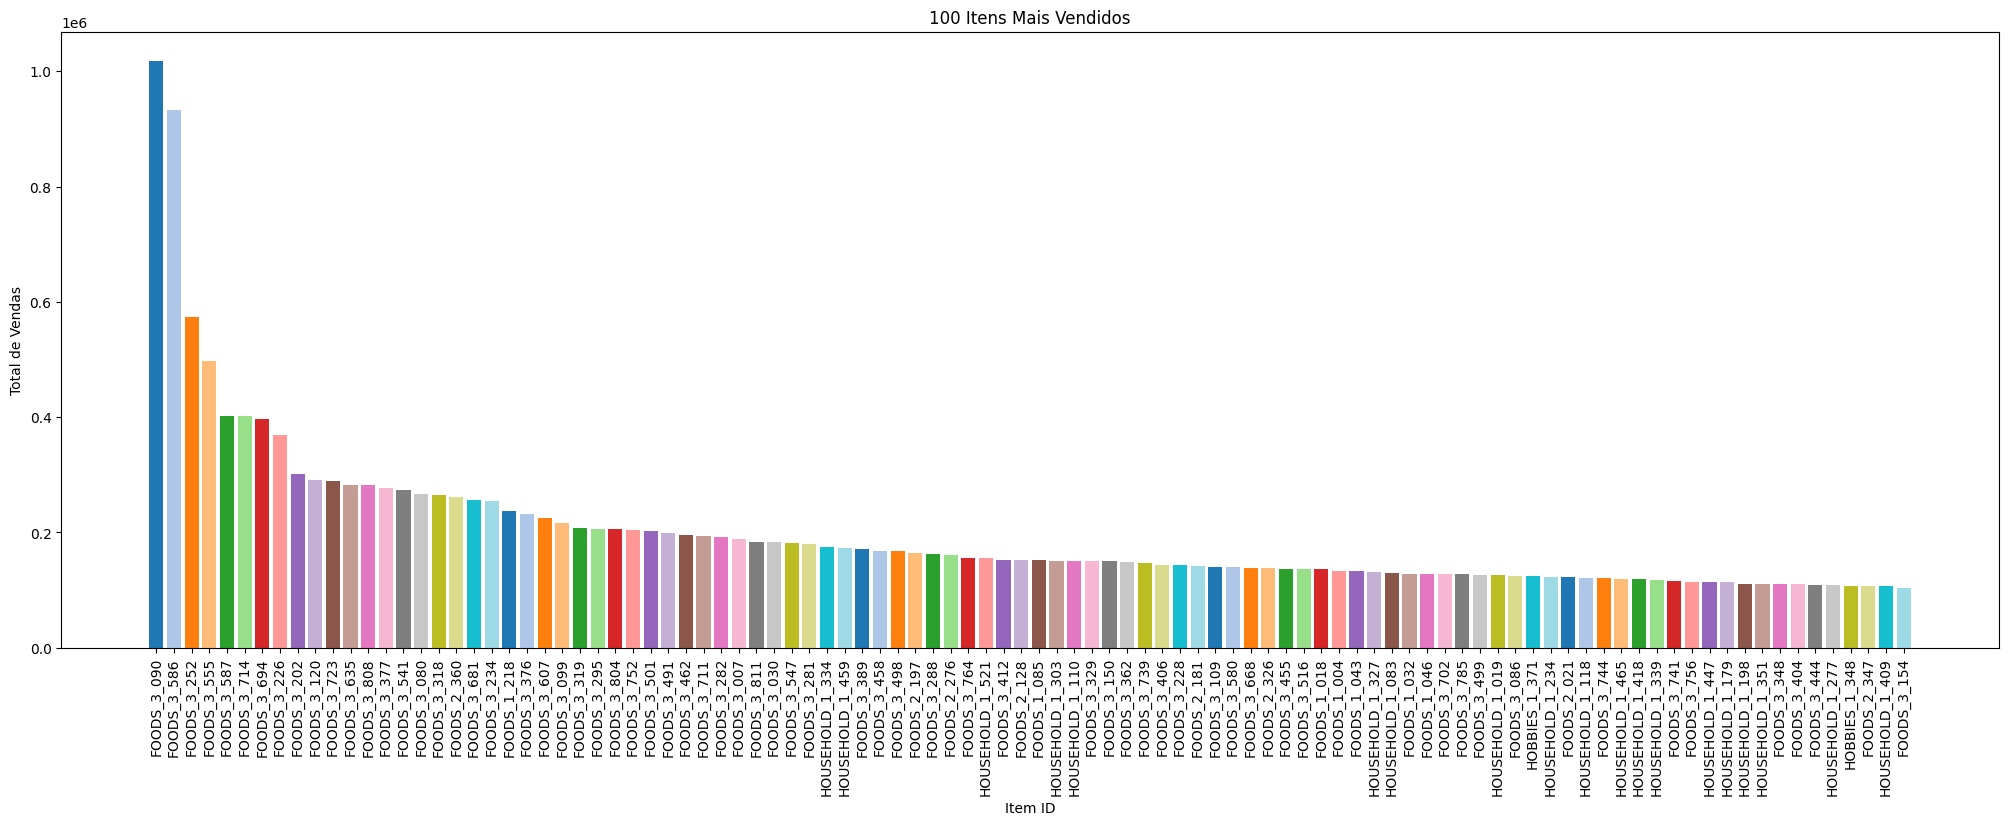

In [ ]:
# Agrupar por 'item_id' e somar os valores de vendas
vendas_por_item = data.groupby('item_id', observed=False)['value'].sum().reset_index()

# Ordenar pelos itens mais vendidos em ordem decrescente
vendas_por_item = vendas_por_item.sort_values(by='value', ascending=False)

# Selecionar os 100 itens mais vendidos
top_100_items = vendas_por_item.head(100)

# Plotar os 100 itens mais vendidos
plt.figure(figsize=(25, 8))
plt.bar(top_100_items['item_id'], top_100_items['value'], color=plt.cm.tab20.colors)
plt.xlabel('Item ID')
plt.ylabel('Total de Vendas')
plt.title('100 Itens Mais Vendidos')
plt.xticks(rotation=90)
plt.show()